08 Demographics

Look at the demographics of the All of Us WGS sample that is being used for the CRC PRS analysis. Uses data where participants with UC/Crohn's are kept. Used the Nov. 2021 PRS. Use admixture estimated from GW SNPs calculated in Notebook '21 Estimate Admixture' 

Comparing ancestry counts for cases and controls, using my.ancestry3, which defines participants as EUR, EAS or SAS if they are >=80% that ancestry, and defines AFR, AMR and MID if they are >=60% that ancestry

Look at admixture plot for the OTH group from my.ancestry3

use standard VM

# Install packages

In [1]:
rm(list=ls())

In [2]:
my.packages <- c('data.table','Hmisc','tidyverse','bigrquery','lubridate','vioplot','xadmix')
lapply(my.packages,
       function(pkg) { if(! pkg %in% installed.packages()) { install.packages(pkg)} } )
lapply(my.packages,library,character.only = TRUE)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

also installing the dependency ‘sm’


Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
✖ purrr::transpose() masks data.table::transpose()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘p

[[1]]
[1] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[6] "datasets"   "methods"    "base"      

[[2]]
[1] "Hmisc"      "data.table" "stats"      "graphics"   "grDevices" 
[6] "utils"      "datasets"   "methods"    "base"      

[[3]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "Hmisc"     
[11] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[16] "datasets"   "methods"    "base"      

[[4]]
 [1] "bigrquery"  "forcats"    "stringr"    "dplyr"      "purrr"     
 [6] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[11] "Hmisc"      "data.table" "stats"      "graphics"   "grDevices" 
[16] "utils"      "datasets"   "methods"    "base"      

[[5]]
 [1] "lubridate"  "timechange" "bigrquery"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "Hmisc"      "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[6]]
 [1] "vioplot"    "zoo"        "sm"         "lubridate"  "timechange"
 [6] "bigrquery"  "forcats"    "stringr"    "dplyr"      "purrr"     
[11] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[16] "Hmisc"      "data.table" "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[7]]
 [1] "xadmix"     "vioplot"    "zoo"        "sm"         "lubridate" 
 [6] "timechange" "bigrquery"  "forcats"    "stringr"    "dplyr"     
[11] "purrr"      "readr"      "tidyr"      "tibble"     "ggplot2"   
[16] "tidyverse"  "Hmisc"      "data.table" "stats"      "graphics"  
[21] "grDevices"  "utils"      "datasets"   "methods"    "base"

In [3]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] xadmix_1.0.0      vioplot_0.4.0     zoo_1.8-11        sm_2.2-5.7.1     
 [5] lubridate_1.9.0   timechange_0.1.1  bigrquery_1.4.1   forcats_0.5.2    
 [9] stringr_1.5.0     dplyr_1.0.10      purrr_0.3.5       readr_2.1.3      
[13] tid

# Pull in the data

In [4]:
# copy over the case/control files I want
infile <- "CRC-case-control-phekb-2022-10-17.tsv"
#cp.command <- paste0("gsutil -m cp -r  gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/",infile," .")
cp.command <- paste0("gsutil -m cp -r  gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/",infile," .")
system(cp.command)

In [ ]:
# read in case/control data
crc.dt <- fread(infile)
str(crc.dt)
length(crc.dt$person_id)
length(unique(crc.dt$person_id))

In [6]:
crc.dt[,person_id:=as.character(person_id)]

In [7]:
# copy over the PRS file
infile <- "total-LDpres.prs.csv"
#cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/alpha3/",infile," .")
cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/alpha3/",infile," .")
system(cp.command, intern=TRUE)

character(0)

In [ ]:
# read in the PRS file
prs.dt <- fread(infile)
str(prs.dt)
prs.dt[,person_id:=as.character(ID)]
length(prs.dt$person_id)
length(unique(prs.dt$person_id))

In [9]:
# merge the two files
setkey(crc.dt,"person_id")
setkey(prs.dt,"person_id")
merge.dt <- prs.dt[crc.dt]
length(merge.dt$person_id)
describe(merge.dt$PRS)

[1] 98256

merge.dt$PRS 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   98256        0    98256        1   0.3411   0.5231 -0.42252 -0.25199 
     .25      .50      .75      .90      .95 
 0.02734  0.34255  0.65374  0.93236  1.10208 

lowest : -1.830499 -1.739795 -1.692679 -1.583401 -1.569621
highest:  2.164760  2.286316  2.289710  2.297082  2.315605

In [10]:
# copy over all the admixture file
infile <- "admixture_aou0"
#(cp.command <- paste0("gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/PCSNPS/",infile,"*.csv ."))
(cp.command <- paste0("gsutil -m cp -r gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/data/PCSNPS/",infile,"*.csv ."))
system(cp.command)

[1] "gsutil -m cp -r gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/data/PCSNPS/admixture_aou0*.csv ."

In [11]:
outfile <- "admixture_aou_all.csv"
(cat.cmd <- paste0("cat ",infile,"*.csv > ",outfile))
system(cat.cmd)

[1] "cat admixture_aou0*.csv > admixture_aou_all.csv"

In [ ]:
admix.dt <- fread(outfile)
str(admix.dt)

In [13]:
#merge all the data
setnames(admix.dt,"ID","person_id")
setkey(admix.dt, "person_id")
setkey(merge.dt,"person_id")

In [ ]:
merge.dt <- admix.dt[merge.dt]
str(merge.dt)

In [15]:
#make admixture estimates numeric. Since the header line is repeated, they are read in as characters
merge.dt[,AFR:=as.numeric(AFR)]
merge.dt[,AMR:=as.numeric(AMR)]
merge.dt[,EAS:=as.numeric(EAS)]
merge.dt[,EUR:=as.numeric(EUR)]
merge.dt[,MID:=as.numeric(MID)]
merge.dt[,SAS:=as.numeric(SAS)]

In [16]:
# create the ancestry assignments
merge.dt[,my.ancestry3:=ifelse(AFR>0.6,"AFR","OTH")]
merge.dt[,my.ancestry3:=ifelse(AMR>0.6,"AMR",my.ancestry3)]
merge.dt[,my.ancestry3:=ifelse(EAS>0.8,"EAS",my.ancestry3)]
merge.dt[,my.ancestry3:=ifelse(EUR>0.8,"EUR",my.ancestry3)]
merge.dt[,my.ancestry3:=ifelse(MID>0.6,"MID",my.ancestry3)]
merge.dt[,my.ancestry3:=ifelse(SAS>0.8,"SAS",my.ancestry3)]
describe(merge.dt$my.ancestry3)

merge.dt$my.ancestry3 
       n  missing distinct 
   98256        0        7 

lowest : AFR AMR EAS EUR MID, highest: EAS EUR MID OTH SAS
                                                    
Value        AFR   AMR   EAS   EUR   MID   OTH   SAS
Frequency  22385  9382  2069 44099  4056 15505   760
Proportion 0.228 0.095 0.021 0.449 0.041 0.158 0.008

In [17]:
# need to have sex be numeric
merge.dt[,sex:=ifelse(sex_at_birth=="Male",1,NA)] #since there are fewer males than females, males are 1 and females are 0
merge.dt[,sex:=ifelse(sex_at_birth=="Female",0,sex)]
#describe(merge.dt$sex_at_birth)
describe(as.factor(merge.dt$sex))

as.factor(merge.dt$sex) 
       n  missing distinct 
   97117     1139        2 
                      
Value          0     1
Frequency  58939 38178
Proportion 0.607 0.393

# Tables

In [ ]:
# Frequency tables for my.ancestry3. Loosest definition of case
(case.count <- data.table(
    as.data.frame(merge.dt) %>%
    group_by(my.ancestry3) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
(case.totals <- data.table(
    as.data.frame(merge.dt) %>%
    #group_by(my.ancestry3) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
case.totals[,my.ancestry3:="All"]
(case.count.table <- rbind(case.count,case.totals))

In [ ]:
# Frequency tables for my.ancestry3. Case defined by pheKB algorithm, but not excluding UC/Chron's
(case.count <- data.table(
    as.data.frame(merge.dt) %>%
    group_by(my.ancestry3) %>%
    summarise(total.CASE=sum(CSET3),perc.CASE=round(100*mean(CSET3),2),COUNT=n()))
)
(case.totals <- data.table(
    as.data.frame(merge.dt) %>%
    #group_by(my.ancestry3) %>%
    summarise(total.CASE=sum(CSET3),perc.CASE=round(100*mean(CSET3),2),COUNT=n()))
)
case.totals[,my.ancestry3:="All"]
(case.clean.count.table <- rbind(case.count,case.totals))


In [ ]:
# total screened controls by my.ancestry3
(control.count <- data.table(
    as.data.frame(merge.dt) %>%
    group_by(my.ancestry3) %>%
    summarise(total.control=sum(SCREENED)))
)
(control.totals <- data.table(
    as.data.frame(merge.dt) %>%
    #group_by(my.ancestry3) %>%
    summarise(total.control=sum(SCREENED)))
)
control.totals[,my.ancestry3:="All"]
(control.count.table <- rbind(control.count,control.totals))

In [ ]:
# combine the count tables
case.count.table <- as.data.table(case.count.table)
case.clean.count.table <- as.data.table(case.clean.count.table)
control.count.table <- as.data.table(control.count.table)
names(case.clean.count.table)
setnames(case.clean.count.table,"total.CASE","clean.CASE")
case.count.table[,perc.CASE:=NULL]
case.clean.count.table[,perc.CASE:=NULL]
case.clean.count.table[,COUNT:=NULL]
case.clean.count.table[,my.ancestry3:=NULL]
control.count.table[,my.ancestry3:=NULL]
(count.table <- cbind(case.count.table, case.clean.count.table, control.count.table))
setnames(count.table,"total.control","screened.control")
count.table[,unscreened.control:=COUNT-(total.CASE+screened.control)]
count.table[,list(my.ancestry3,total.CASE,clean.CASE,screened.control,unscreened.control,COUNT)]

It looks like there may not be enough cases of EAS or SAS descent. The numbers for AMR are iffy as well.  

In [ ]:
#skip for now
(case.count <- data.table(
    as.data.frame(merge.dt) %>%
    group_by(age.factor) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
(case.totals <- data.table(
    as.data.frame(merge.dt) %>%
    #group_by(my.ancestry) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
case.totals[,age.factor:="All"]
(case.count.table <- rbind(case.count,case.totals))
#cumsum(case.count.table$perc.CASE)

In [ ]:
#How many UC/Croh'n participants
sum(merge.dt$UC1[merge.dt$CRC.status==1])
sum(merge.dt$UC1[merge.dt$CSET3==1])
sum(merge.dt$UC1[merge.dt$SCREENED==1])
sum(merge.dt$UC1[merge.dt$SCREENED==0 & merge.dt$CRC.status==0])
sum(merge.dt$UC1)

In [ ]:
#How many UC/Croh'n participants
sum(merge.dt$UC2[merge.dt$CRC.status==1])
sum(merge.dt$UC2[merge.dt$CSET3==1])
sum(merge.dt$UC2[merge.dt$SCREENED==1])
sum(merge.dt$UC2[merge.dt$SCREENED==0 & merge.dt$CRC.status==0])
sum(merge.dt$UC2)

In [24]:
describe(merge.dt$censored.age)

merge.dt$censored.age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   90665     7591    21662        1    51.25    19.05    23.69    27.49 
     .25      .50      .75      .90      .95 
   37.44    52.90    64.28    72.18    76.37 

lowest :  18.00000  18.00548  18.00821  18.01095  18.02738
highest:  99.72142 100.43309 101.01095 103.48238 104.47416

In [25]:
# what is the distribution if I use censored age? That might help me decide what age cutoffs to use that would make sense
merge.dt[,age.cen.factor:=cut(censored.age, c(min(AGE,na.rm=TRUE)-1,breaks=seq(from=20,to=100,by=10),max(AGE,na.rm=TRUE)) )]
head(merge.dt$age.cen.factor)
summary(merge.dt$age.cen.factor)

[1] (70,80] (60,70] (50,60] (60,70] (30,40] (30,40]
10 Levels: (17,20] (20,30] (30,40] (40,50] (50,60] (60,70] (70,80] ... (100,104]

(17,20]   (20,30]   (30,40]   (40,50]   (50,60]   (60,70]   (70,80]   (80,90] 
     1135     11390     13637     13638     19562     18869     10245      2027 
 (90,100] (100,104]      NA's 
      158         4      7591

In [ ]:
# why do I have participants older than 100? Double check the dob on these.
merge.dt[,list(person_id, censored.age, AGE, dob)][merge.dt$censored.age>100]

In [ ]:
(case.count <- data.table(
    as.data.frame(merge.dt) %>%
    group_by(age.cen.factor) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
(case.totals <- data.table(
    as.data.frame(merge.dt) %>%
    #group_by(my.ancestry) %>%
    summarise(total.CASE=sum(CRC.status),perc.CASE=round(100*mean(CRC.status),2),COUNT=n()))
)
case.totals[,age.cen.factor:="All"]
(case.count.table <- rbind(case.count,case.totals))

In [28]:
# do I want to age by case and control separately? and then merge those tables?
# how about using violin plots?
# cases
(age.dist.case <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==1 & !is.na(censored.age)]) %>%
    group_by(my.ancestry3) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
(age.all.case <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==1 & !is.na(censored.age)]) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
age.all.case[,my.ancestry3:="All"]
(age.dist.case.table <- rbind(age.dist.case,age.all.case))


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,58,"32,88"
AMR,52,"21,86"
EAS,55,"30,76"
EUR,62,"25,91"
MID,65,"34,84"
OTH,56,"19,86"
SAS,41,"34,48"


mean.age,age.range
<dbl>,<chr>
60,"19,91"


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,58,"32,88"
AMR,52,"21,86"
EAS,55,"30,76"
EUR,62,"25,91"
MID,65,"34,84"
OTH,56,"19,86"
SAS,41,"34,48"
All,60,"19,91"


In [29]:
# age range for cleaned cases
(age.dist.case <- data.table(
    as.data.frame(merge.dt[][merge.dt$CSET3==1 & !is.na(censored.age)]) %>%
    group_by(my.ancestry3) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
(age.all.case <- data.table(
    as.data.frame(merge.dt[][merge.dt$CSET3==1 & !is.na(censored.age)]) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
age.all.case[,my.ancestry3:="All"]
(age.dist.clean.case.table <- rbind(age.dist.case,age.all.case))


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,57,"41,83"
AMR,53,"21,86"
EAS,57,"43,76"
EUR,62,"26,89"
MID,65,"34,84"
OTH,55,"19,83"
SAS,41,"34,48"


mean.age,age.range
<dbl>,<chr>
60,"19,89"


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,57,"41,83"
AMR,53,"21,86"
EAS,57,"43,76"
EUR,62,"26,89"
MID,65,"34,84"
OTH,55,"19,83"
SAS,41,"34,48"
All,60,"19,89"


In [30]:
# Age range for controls
(age.dist.control <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0 & !is.na(censored.age)]) %>%
    group_by(my.ancestry3) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
(age.all.control <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0 & !is.na(censored.age)]) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
age.all.control[,my.ancestry3:="All"]
(age.dist.control.table <- rbind(age.dist.control,age.all.control))

my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,49,"18,104"
AMR,44,"18,100"
EAS,45,"18,88"
EUR,55,"18,103"
MID,61,"18,101"
OTH,48,"18,100"
SAS,42,"18,82"


mean.age,age.range
<dbl>,<chr>
51,"18,104"


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,49,"18,104"
AMR,44,"18,100"
EAS,45,"18,88"
EUR,55,"18,103"
MID,61,"18,101"
OTH,48,"18,100"
SAS,42,"18,82"
All,51,"18,104"


In [31]:
# Age range for screended controls
(age.dist.controlA <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0 & merge.dt$SCREENED==1 & !is.na(censored.age)]) %>%
    group_by(my.ancestry3) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
(age.all.controlA <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0  & merge.dt$SCREENED==1 & !is.na(censored.age)]) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
age.all.controlA[,my.ancestry3:="All"]
(age.dist.control.tableA <- rbind(age.dist.controlA,age.all.controlA))

my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,57,"18,90"
AMR,56,"20,82"
EAS,58,"25,82"
EUR,61,"18,94"
MID,64,"18,96"
OTH,58,"18,88"
SAS,57,"23,77"


mean.age,age.range
<dbl>,<chr>
60,"18,96"


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,57,"18,90"
AMR,56,"20,82"
EAS,58,"25,82"
EUR,61,"18,94"
MID,64,"18,96"
OTH,58,"18,88"
SAS,57,"23,77"
All,60,"18,96"


In [32]:
addparentheses <- function(x){paste0("(", x, ")")}


In [33]:
# join cases and controls
setnames(age.dist.case.table,c("Ancestry","case.mean","case.range"))
age.dist.clean.case.table[,my.ancestry3:=NULL]
setnames(age.dist.clean.case.table,c("case3.mean","case3.range"))
age.dist.control.table[,my.ancestry3:=NULL]
setnames(age.dist.control.table,c("control.mean","control.range"))
age.dist.control.tableA[,my.ancestry3:=NULL]
setnames(age.dist.control.tableA,c("controlA.mean","controlA.range"))
(age.dist.table <- cbind(age.dist.case.table,age.dist.clean.case.table,age.dist.control.table, age.dist.control.tableA))


Ancestry,case.mean,case.range,case3.mean,case3.range,control.mean,control.range,controlA.mean,controlA.range
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
AFR,58,"32,88",57,"41,83",49,"18,104",57,"18,90"
AMR,52,"21,86",53,"21,86",44,"18,100",56,"20,82"
EAS,55,"30,76",57,"43,76",45,"18,88",58,"25,82"
EUR,62,"25,91",62,"26,89",55,"18,103",61,"18,94"
MID,65,"34,84",65,"34,84",61,"18,101",64,"18,96"
OTH,56,"19,86",55,"19,83",48,"18,100",58,"18,88"
SAS,41,"34,48",41,"34,48",42,"18,82",57,"23,77"
All,60,"19,91",60,"19,89",51,"18,104",60,"18,96"


In [34]:
all.cols <- names(age.dist.table)
(range.cols <- all.cols[all.cols %like% "range"])

age.dist.table[,(range.cols):=lapply(.SD, addparentheses), .SDcols=range.cols]

(age.dist.table.unite <- as.data.frame(age.dist.table) %>%
    unite(case.age,c(case.mean,case.range),sep="") %>%
    unite(case3.age,c(case3.mean,case3.range),sep="") %>%
    unite(control.age,c(control.mean,control.range),sep="") %>%
    unite(controlA.age,c(controlA.mean,controlA.range),sep="") )
   

[1] "case.range"     "case3.range"    "control.range"  "controlA.range"

Ancestry,case.age,case3.age,control.age,controlA.age
<chr>,<chr>,<chr>,<chr>,<chr>
AFR,"58(32,88)","57(41,83)","49(18,104)","57(18,90)"
AMR,"52(21,86)","53(21,86)","44(18,100)","56(20,82)"
EAS,"55(30,76)","57(43,76)","45(18,88)","58(25,82)"
EUR,"62(25,91)","62(26,89)","55(18,103)","61(18,94)"
MID,"65(34,84)","65(34,84)","61(18,101)","64(18,96)"
OTH,"56(19,86)","55(19,83)","48(18,100)","58(18,88)"
SAS,"41(34,48)","41(34,48)","42(18,82)","57(23,77)"
All,"60(19,91)","60(19,89)","51(18,104)","60(18,96)"


Age distribution of cleaned cases is not much different from all cases (makes up half the sample, to makese sense)
It appears that censored age for all controls is lower than that of cases. However, screended controls tend to have similar age to cases.  

In [35]:
# Age range for non-screended controls
(age.dist.controlB <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0 & merge.dt$SCREENED==0 & !is.na(censored.age)]) %>%
    group_by(my.ancestry3) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
(age.all.controlB <- data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0  & merge.dt$SCREENED==0 & !is.na(censored.age)]) %>%
    summarise(mean.age=round(mean(censored.age)),min.age=round(min(censored.age)),max.age=round(max(censored.age))) %>%
    unite("age.range", min.age,max.age,sep=",")
))
age.all.controlB[,my.ancestry3:="All"]
(age.dist.control.tableB <- rbind(age.dist.controlB,age.all.controlB))

my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,48,"18,104"
AMR,43,"18,100"
EAS,44,"18,88"
EUR,54,"18,103"
MID,59,"18,101"
OTH,46,"18,100"
SAS,41,"18,82"


mean.age,age.range
<dbl>,<chr>
50,"18,104"


my.ancestry3,mean.age,age.range
<chr>,<dbl>,<chr>
AFR,48,"18,104"
AMR,43,"18,100"
EAS,44,"18,88"
EUR,54,"18,103"
MID,59,"18,101"
OTH,46,"18,100"
SAS,41,"18,82"
All,50,"18,104"


In [36]:
# join cases and non-screened and screened controls
setnames(age.dist.case.table,c("Ancestry","case.mean","case.range"))
age.dist.control.tableB[,my.ancestry3:=NULL]
setnames(age.dist.control.tableB,c("controlB.mean","controlB.range"))
age.dist.control.tableA[,my.ancestry3:=NULL]
setnames(age.dist.control.tableA,c("controlA.mean","controlA.range"))
(age.dist.table <- cbind(age.dist.case.table,age.dist.clean.case.table,age.dist.control.tableB, age.dist.control.tableA))

Warning message in `[.data.table`(age.dist.control.tableA, , `:=`(my.ancestry3, :
“Column 'my.ancestry3' does not exist to remove”


Ancestry,case.mean,case.range,case3.mean,case3.range,controlB.mean,controlB.range,controlA.mean,controlA.range
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
AFR,58,"32,88",57,"41,83",48,"18,104",57,"18,90"
AMR,52,"21,86",53,"21,86",43,"18,100",56,"20,82"
EAS,55,"30,76",57,"43,76",44,"18,88",58,"25,82"
EUR,62,"25,91",62,"26,89",54,"18,103",61,"18,94"
MID,65,"34,84",65,"34,84",59,"18,101",64,"18,96"
OTH,56,"19,86",55,"19,83",46,"18,100",58,"18,88"
SAS,41,"34,48",41,"34,48",41,"18,82",57,"23,77"
All,60,"19,91",60,"19,89",50,"18,104",60,"18,96"


In [37]:
all.cols <- names(age.dist.table)
(range.cols <- all.cols[all.cols %like% "range"])

age.dist.table[,(range.cols):=lapply(.SD, addparentheses), .SDcols=range.cols]

(age.dist.table.unite <- as.data.frame(age.dist.table) %>%
    unite(case.age,c(case.mean,case.range),sep="") %>%
    unite(case3.age,c(case3.mean,case3.range),sep="") %>%
    unite(controlB.age,c(controlB.mean,controlB.range),sep="") %>%
    unite(controlA.age,c(controlA.mean,controlA.range),sep="") )

[1] "case.range"     "case3.range"    "controlB.range" "controlA.range"

Ancestry,case.age,case3.age,controlB.age,controlA.age
<chr>,<chr>,<chr>,<chr>,<chr>
AFR,"58(32,88)","57(41,83)","48(18,104)","57(18,90)"
AMR,"52(21,86)","53(21,86)","43(18,100)","56(20,82)"
EAS,"55(30,76)","57(43,76)","44(18,88)","58(25,82)"
EUR,"62(25,91)","62(26,89)","54(18,103)","61(18,94)"
MID,"65(34,84)","65(34,84)","59(18,101)","64(18,96)"
OTH,"56(19,86)","55(19,83)","46(18,100)","58(18,88)"
SAS,"41(34,48)","41(34,48)","41(18,82)","57(23,77)"
All,"60(19,91)","60(19,89)","50(18,104)","60(18,96)"


In [38]:
# what is the distribution of difference in censored.age and age of consent for cases and controls
diff.ages <- merge.dt$censored.age - merge.dt$AGE
describe(diff.ages[merge.dt$CRC.status==1])
describe(diff.ages[merge.dt$CSET3==1])
describe(diff.ages[merge.dt$SCREENED==1])
describe(diff.ages[merge.dt$CRC.status==0 & merge.dt$SCREENED==0])

diff.ages[merge.dt$CRC.status == 1] 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
      457       211       449         1    -4.808     5.724 -16.00986 -12.49719 
      .25       .50       .75       .90       .95 
 -7.25000  -3.43036  -0.50548   0.08169   0.86071 

lowest : -27.230835 -26.758214 -26.519165 -23.333333 -23.177618
highest:   2.075120   2.166667   2.292266   2.379877   2.508214

diff.ages[merge.dt$CSET3 == 1] 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
      247       101       246         1    -5.172     6.074 -16.24144 -13.16509 
      .25       .50       .75       .90       .95 
 -7.92077  -3.49726  -0.60113   0.07495   0.86182 

lowest : -27.230835 -26.758214 -26.519165 -23.177618 -21.919405
highest:   1.663929   2.075120   2.166667   2.292266   2.508214

diff.ages[merge.dt$SCREENED == 1] 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10577     1801     8060        1   -2.497    4.193 -10.7763  -7.7988 
     .25      .50      .75      .90      .95 
 -3.9863  -1.3525   0.2719   1.3196   1.7891 

lowest : -33.852498 -32.752738 -31.993326 -28.944045 -28.882615
highest:   3.534052   3.555955   3.609172   3.677618   3.722621

diff.ages[merge.dt$CRC.status == 0 & merge.dt$SCREENED == 0] 
       n  missing distinct     Info     Mean      Gmd 
   77619     7591        1        0        0        0 
                
Value          0
Frequency  77619
Proportion     1

In [ ]:
as.data.frame(merge.dt[][merge.dt$CRC.status==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)

In [ ]:
as.data.frame(merge.dt[][merge.dt$CRC.status==1 & merge.dt$sex_at_birth != "PMI: Skip"]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)

In [ ]:
# tables for sex. cases
(sex.dist.case <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)
    ), sex_at_birth,n, fill=0))

(sex.dist.case.table <- rbind(sex.dist.case,list("All cases",sum(sex.dist.case$Female),sum(sex.dist.case$Male),sum(sex.dist.case$"PMI: Skip"))))
# add in the percent male to the table
(sex.dist.case.table <- data.table(
    as.data.frame(sex.dist.case.table) %>%
    mutate(Perc.M=round(100*Male/(Female+Male)))
    ))

In [ ]:
(sex.dist.case <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$CSET3==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)
    ), sex_at_birth,n, fill=0))

(sex.dist.case.table <- rbind(sex.dist.case,list("Cleaned cases",sum(sex.dist.case$Female),sum(sex.dist.case$Male),sum(sex.dist.case$"PMI: Skip"))))
# add in the percent male to the table
(sex.dist.case.table <- data.table(
    as.data.frame(sex.dist.case.table) %>%
    mutate(Perc.M=round(100*Male/(Female+Male)))
    ))

In [ ]:
# tables for sex. controls
(sex.dist.control <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==0]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)
    ), sex_at_birth,n, fill=0))

(sex.dist.control.table <- rbind(sex.dist.control,list("All controls",sum(sex.dist.control$Female),
                                                       sum(sex.dist.control$"I prefer not to answer"), 
                                                       sum(sex.dist.control$Intersex),sum(sex.dist.control$Male),
                                                       sum(sex.dist.control$"No matching concept"),
                                                       sum(sex.dist.control$"None"), 
                                                       sum(sex.dist.control$"PMI: Skip"))))
# add in the percent male to the table
(sex.dist.control.table <- data.table(
    as.data.frame(sex.dist.control.table) %>%
    mutate(Perc.M=round(100*Male/(Female+Male)))
    ))

In [ ]:
# tables for sex. screened controls
(sex.dist.control <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$SCREENED==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex_at_birth)
    ), sex_at_birth,n, fill=0))

(sex.dist.control.table <- rbind(sex.dist.control,list("Screened controls",sum(sex.dist.control$Female),
                                                       sum(sex.dist.control$"I prefer not to answer"), 
                                                       sum(sex.dist.control$Male),
                                                       sum(sex.dist.control$"None"), 
                                                       sum(sex.dist.control$"PMI: Skip"))))
# add in the percent male to the table
(sex.dist.control.table <- data.table(
    as.data.frame(sex.dist.control.table) %>%
    mutate(Perc.M=round(100*Male/(Female+Male)))
    ))

In [ ]:
# get sex distribution for Female, Male, and NA all cases
(sex.dist.case <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$CRC.status==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex)
    ), sex,n, fill=0))
setnames(sex.dist.case,c("Ancestry","F","M","NA"))
(sex.dist.case.table <- rbind(sex.dist.case,list("All cases",sum(sex.dist.case$F),sum(sex.dist.case$M),sum(sex.dist.case$"NA"))))
# add in the percent male to the table
(sex.dist.case.table <- data.table(
    as.data.frame(sex.dist.case.table) %>%
    mutate(Perc.M=round(100*M/(F+M)))
    ))

In [ ]:
# get sex distribution for Female, Male, and NA; cleaned cases
(sex.dist.clean.case <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$CSET3==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex)
    ), sex,n, fill=0))

setnames(sex.dist.clean.case,c("Ancestry","F","M","NA"))
(sex.dist.clean.case.table <- rbind(sex.dist.clean.case,list("All cases",sum(sex.dist.clean.case$F),
                                                             sum(sex.dist.clean.case$M),sum(sex.dist.clean.case$"NA"))))
# add in the percent male to the table
(sex.dist.clean.case.table <- data.table(
    as.data.frame(sex.dist.clean.case.table) %>%
    mutate(Perc.M=round(100*M/(F+M)))
    ))

In [ ]:
# get sex distribution for Female, Male, and NA; screaned controls
(sex.dist.screen.control <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$SCREENED==1]) %>%
    group_by(my.ancestry3) %>%
    count(sex)
    ), sex,n, fill=0))

setnames(sex.dist.screen.control,c("Ancestry","F","M","NA"))
(sex.dist.screen.control.table <- rbind(sex.dist.screen.control,list("All cases",sum(sex.dist.screen.control$F),
                                                             sum(sex.dist.screen.control$M),sum(sex.dist.screen.control$"NA"))))
# add in the percent male to the table
(sex.dist.screen.control.table <- data.table(
    as.data.frame(sex.dist.screen.control.table) %>%
    mutate(Perc.M=round(100*M/(F+M)))
    ))

In [ ]:
# get sex distribution for Female, Male, and NA; unscreaned controls
(sex.dist.unscreen.control <- spread(data.table(
    as.data.frame(merge.dt[][merge.dt$SCREENED==0 & merge.dt$CRC.status==0]) %>%
    group_by(my.ancestry3) %>%
    count(sex)
    ), sex,n, fill=0))

setnames(sex.dist.unscreen.control,c("Ancestry","F","M","NA"))
(sex.dist.unscreen.control.table <- rbind(sex.dist.unscreen.control,list("All cases",sum(sex.dist.unscreen.control$F),
                                                             sum(sex.dist.unscreen.control$M),sum(sex.dist.unscreen.control$"NA"))))
# add in the percent male to the table
(sex.dist.unscreen.control.table <- data.table(
    as.data.frame(sex.dist.unscreen.control.table) %>%
    mutate(Perc.M=round(100*M/(F+M)))
    ))

In [54]:
(names2fix <- names(sex.dist.case.table)[-1])

[1] "F"      "M"      "NA"     "Perc.M"

In [58]:
setnames(sex.dist.case.table, names2fix,paste0("All.Cases_",names2fix))
names(sex.dist.case.table)

[1] "Ancestry"         "All.Cases_F"      "All.Cases_M"      "All.Cases_NA"    
[5] "All.Cases_Perc.M"

In [57]:
setnames(sex.dist.clean.case.table, names2fix,paste0("Cleaned.Cases_",names2fix))
names(sex.dist.clean.case.table)

[1] "Ancestry"             "Cleaned.Cases_F"      "Cleaned.Cases_M"     
[4] "Cleaned.Cases_NA"     "Cleaned.Cases_Perc.M"

In [59]:
setnames(sex.dist.screen.control.table, names2fix,paste0("Screen.Control_",names2fix))
names(sex.dist.screen.control.table)

[1] "Ancestry"              "Screen.Control_F"      "Screen.Control_M"     
[4] "Screen.Control_NA"     "Screen.Control_Perc.M"

In [60]:
setnames(sex.dist.unscreen.control.table, names2fix,paste0("Unscreen.Control_",names2fix))
names(sex.dist.unscreen.control.table)

[1] "Ancestry"                "Unscreen.Control_F"     
[3] "Unscreen.Control_M"      "Unscreen.Control_NA"    
[5] "Unscreen.Control_Perc.M"

In [61]:
setkey(sex.dist.case.table, "Ancestry")
setkey(sex.dist.clean.case.table, "Ancestry")
setkey(sex.dist.screen.control.table, "Ancestry")
setkey(sex.dist.unscreen.control.table, "Ancestry")


In [ ]:
out.table <- sex.dist.case.table[sex.dist.clean.case.table]
setkey(out.table,"Ancestry")
out.table <- out.table[sex.dist.screen.control.table]
setkey(out.table,"Ancestry")
out.table <- out.table[sex.dist.unscreen.control.table]
out.table

# Admixture plot for OTH

In [18]:
#set up the colors
(anc.colors <- rev(c("red","blue","cyan","gray20","purple","orange")))
palette(anc.colors)

[1] "orange" "purple" "gray20" "cyan"   "blue"   "red"

In [19]:
#set up function
my_admix_barplot <- function(subset.dt, sortkey="EUR")
    {
    index <- seq(1:length(subset.dt$person_id))
    subset.dt[,INDEX:=index]
    setcolorder(subset.dt, c("person_id","INDEX","AFR", "AMR", "EAS", "EUR","MID", "SAS"))
    admix_barplot(data=subset.dt, individual=2,K = 3:ncol(subset.dt), sortkey=sortkey,palette=anc.colors, names=FALSE)
}

In [20]:
keep.ancestry="OTH"
subset.dt <- merge.dt[,list(person_id, AFR, AMR, EAS, EUR,MID, SAS)][merge.dt$my.ancestry3==keep.ancestry]

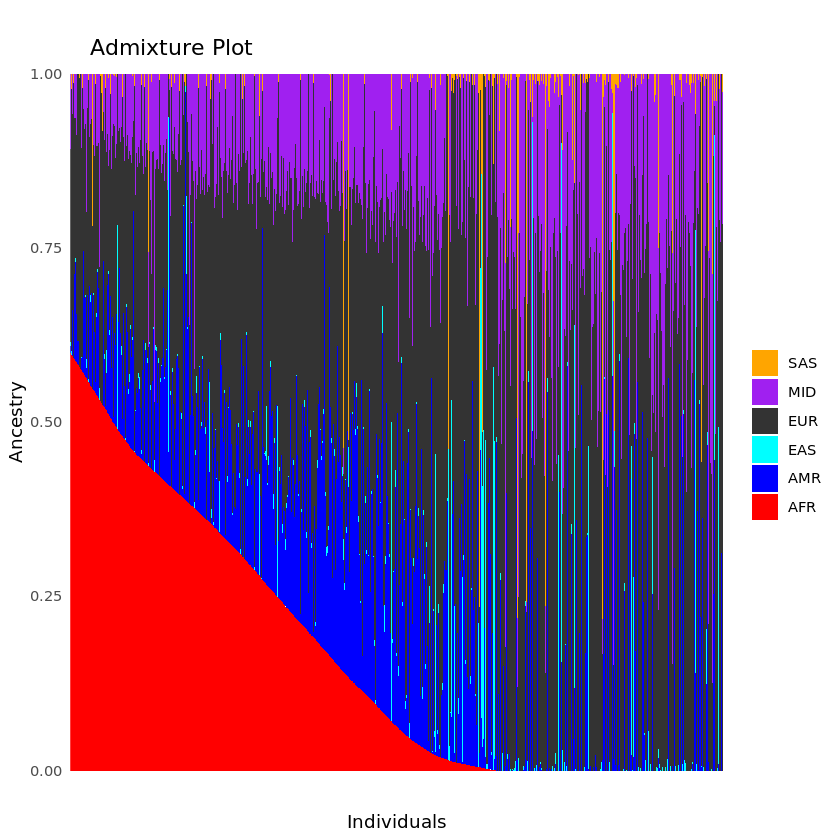

In [21]:
my_admix_barplot(subset.dt, sortkey="AFR")

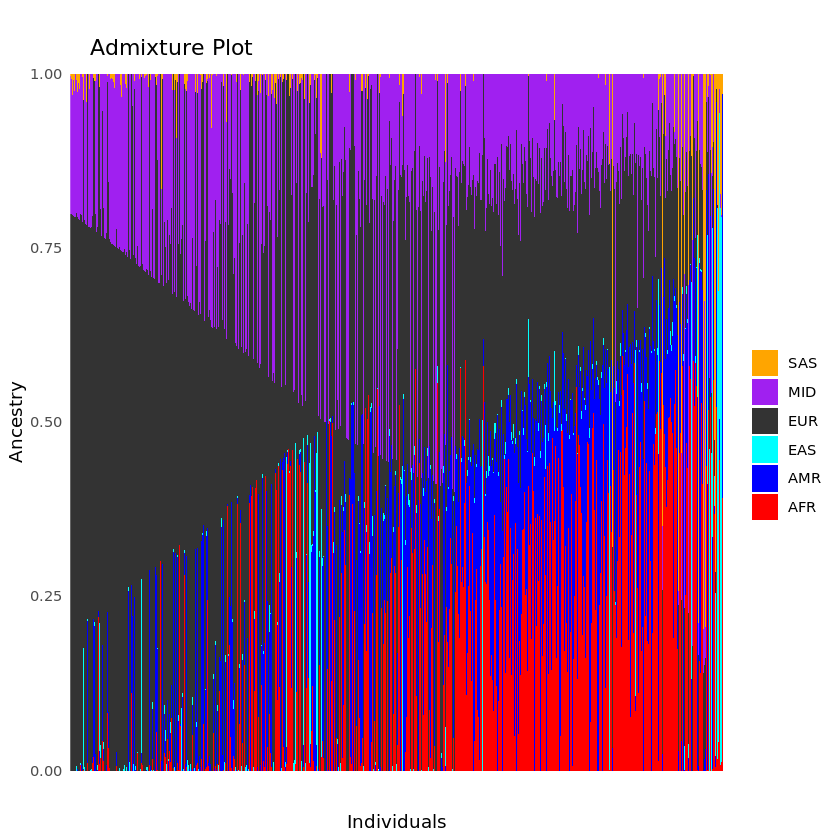

In [22]:
my_admix_barplot(subset.dt, sortkey="EUR")

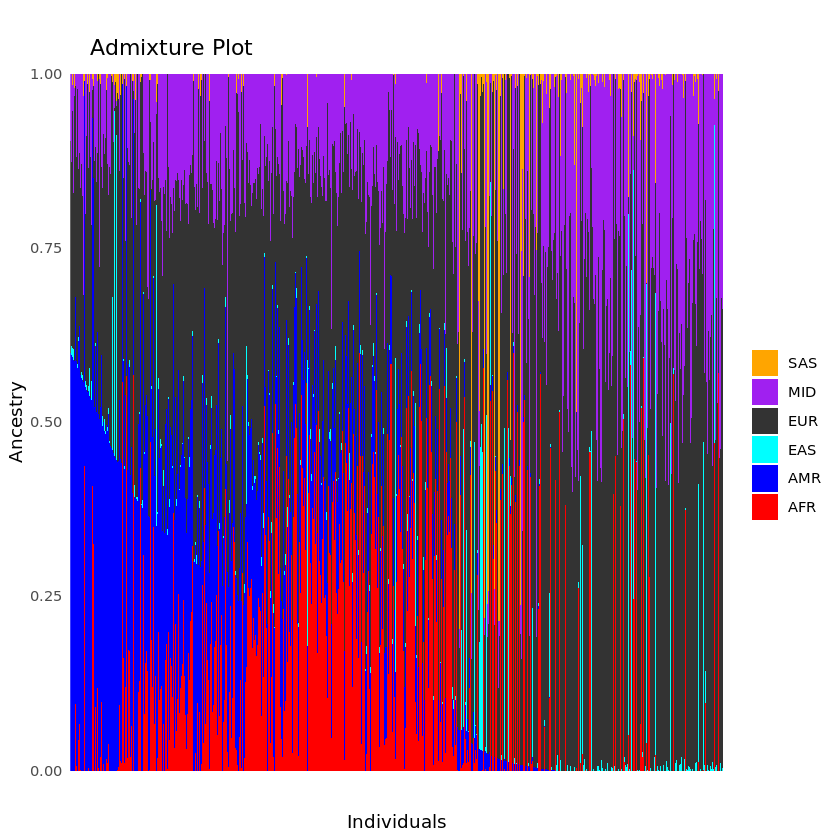

In [23]:
my_admix_barplot(subset.dt, sortkey="AMR")

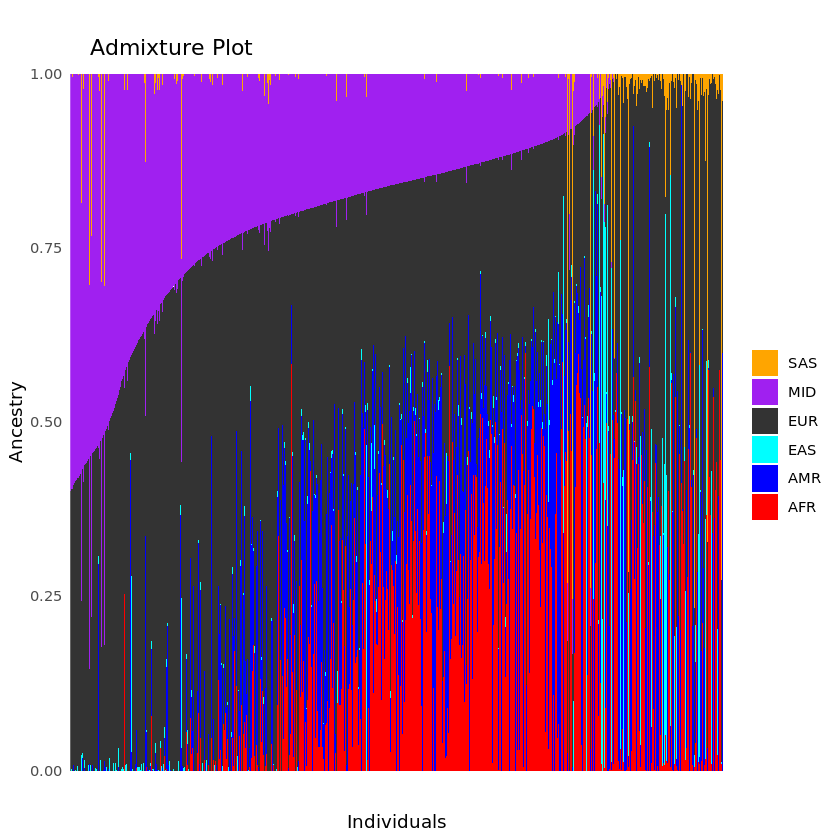

In [24]:
my_admix_barplot(subset.dt, sortkey="MID")

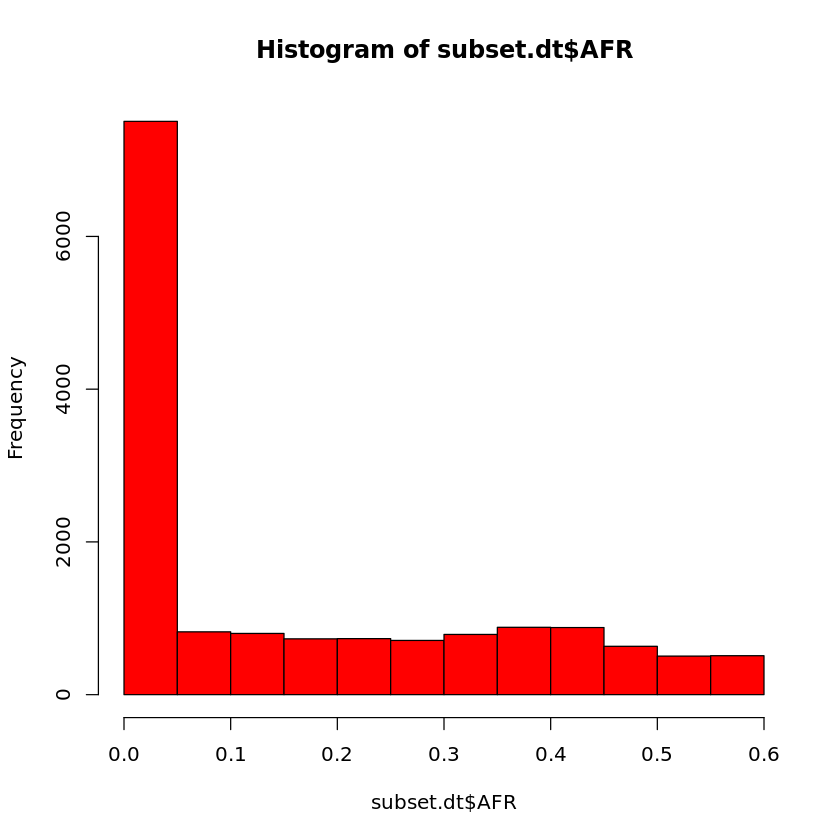

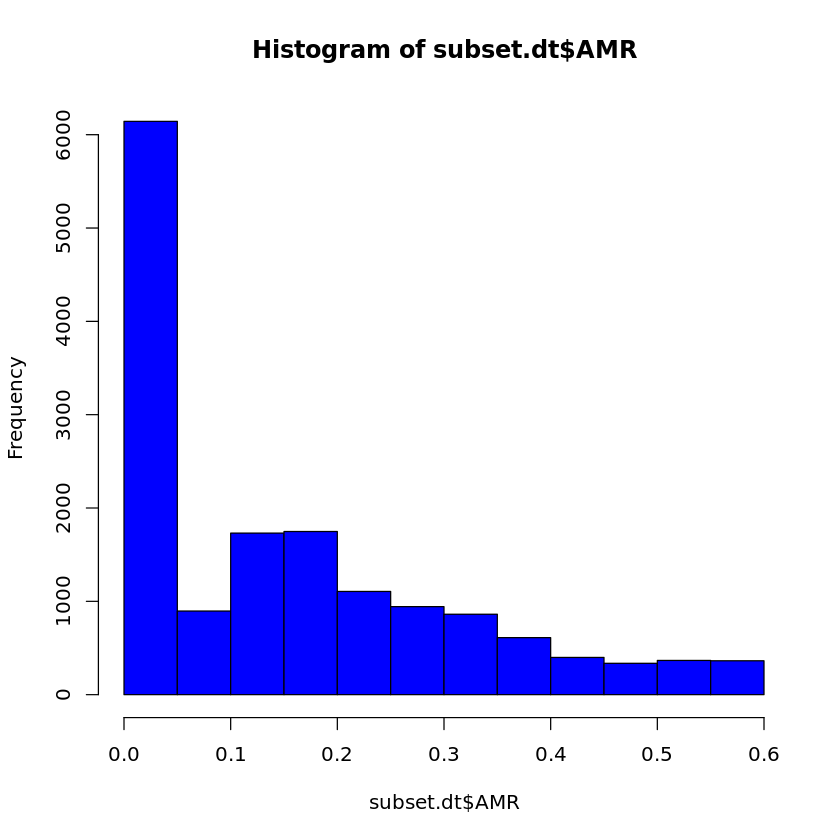

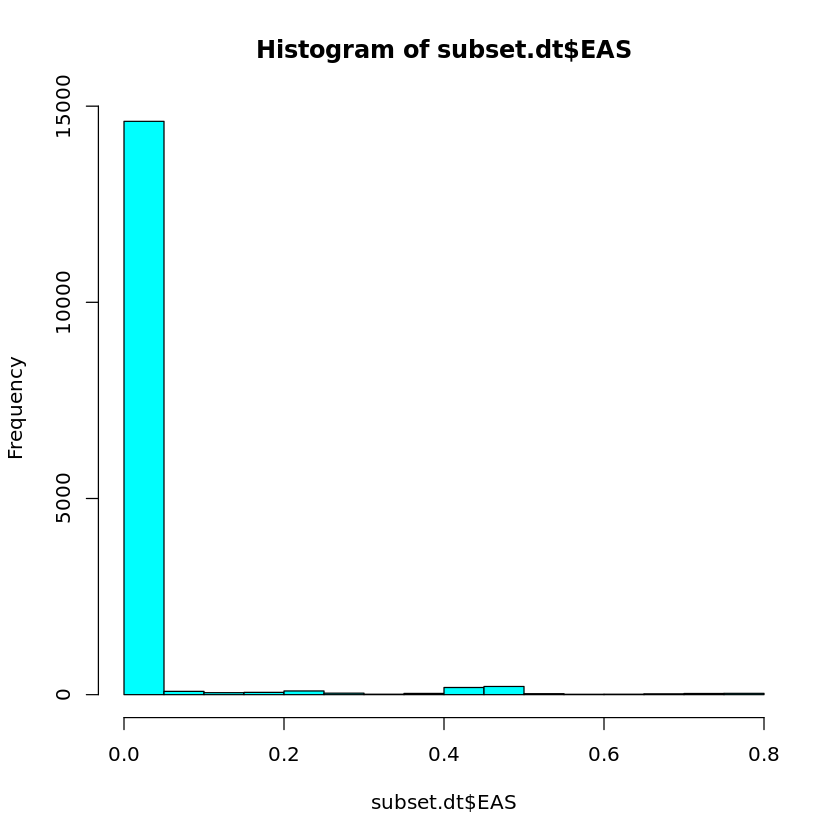

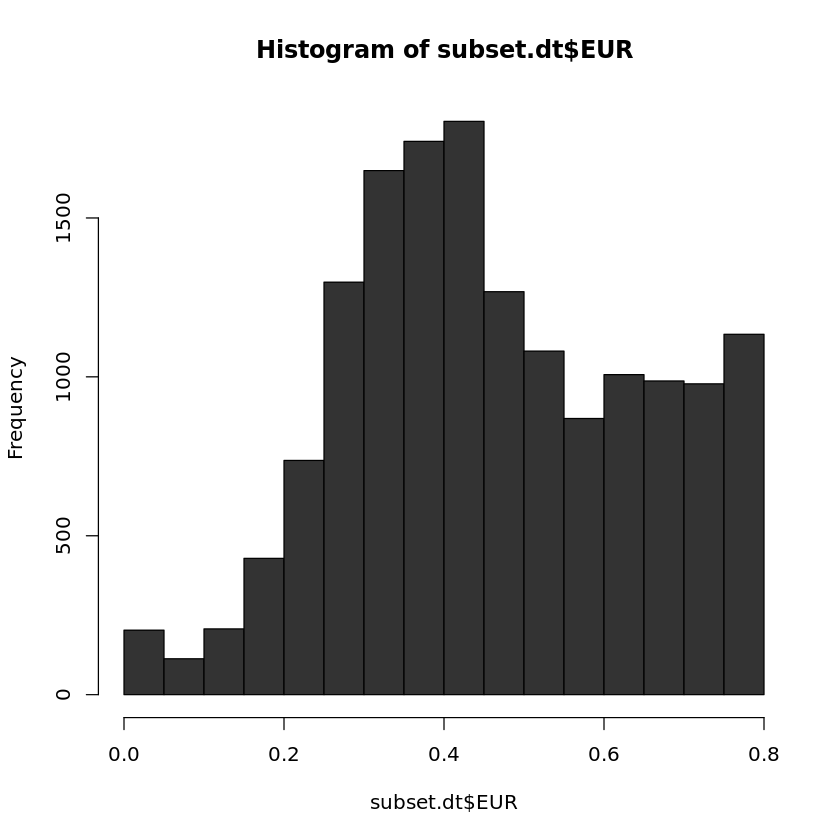

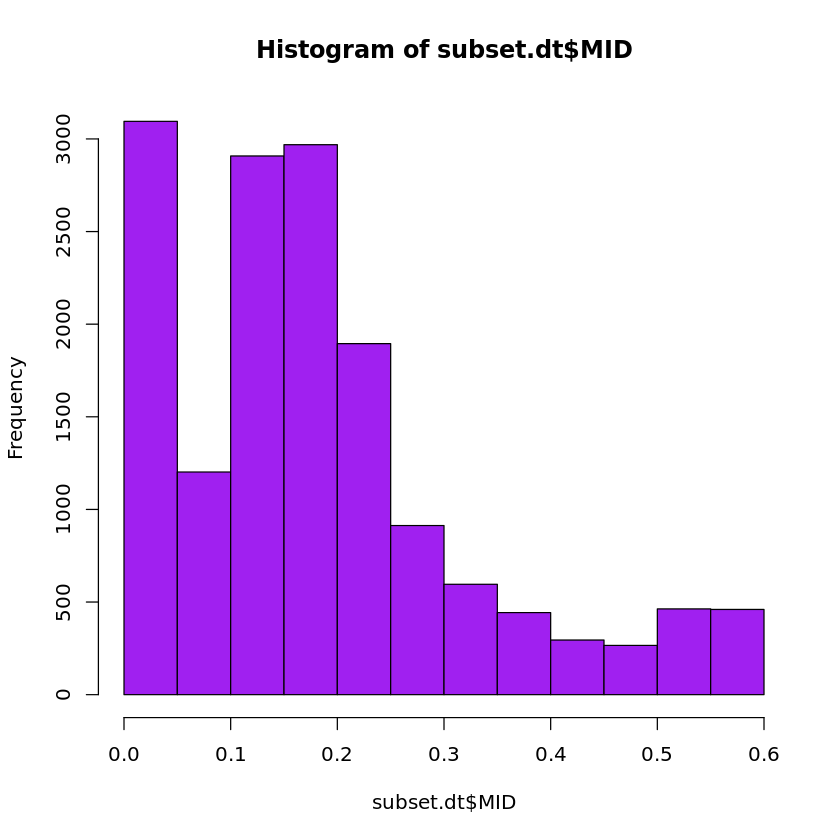

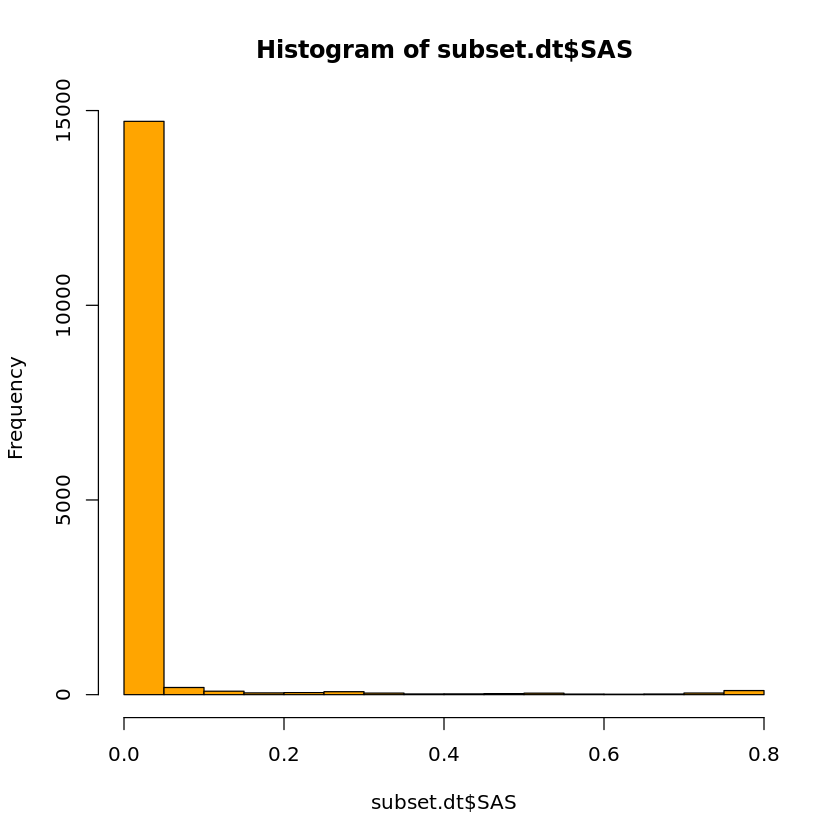

In [25]:
hist(subset.dt$AFR, col="red")
hist(subset.dt$AMR, col="blue")
hist(subset.dt$EAS, col="cyan")
hist(subset.dt$EUR, col="gray20")
hist(subset.dt$MID, col="purple")
hist(subset.dt$SAS, col="orange")

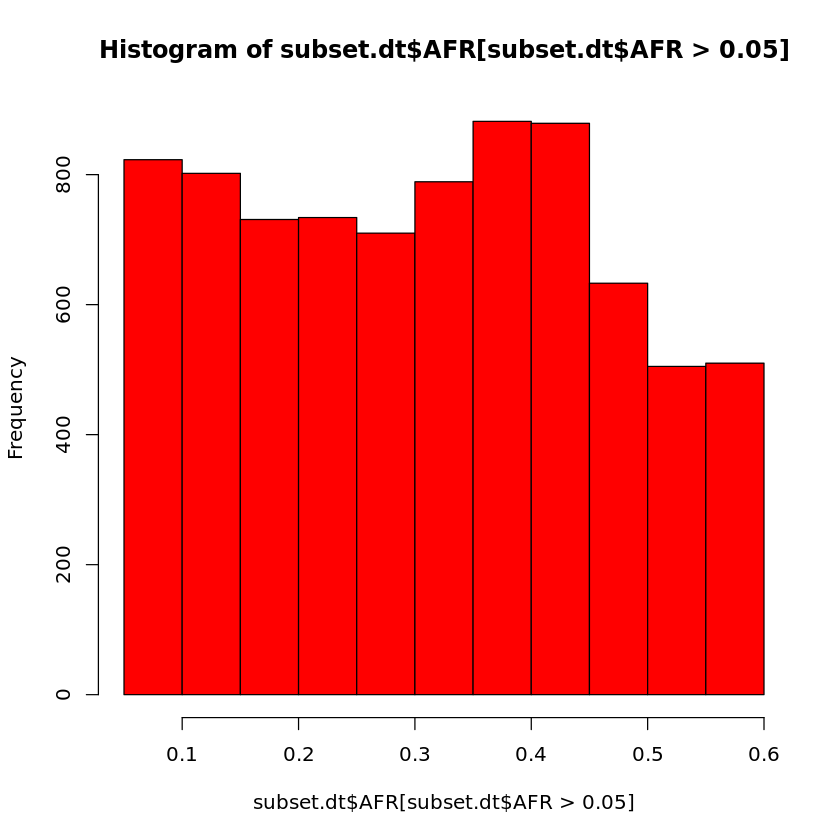

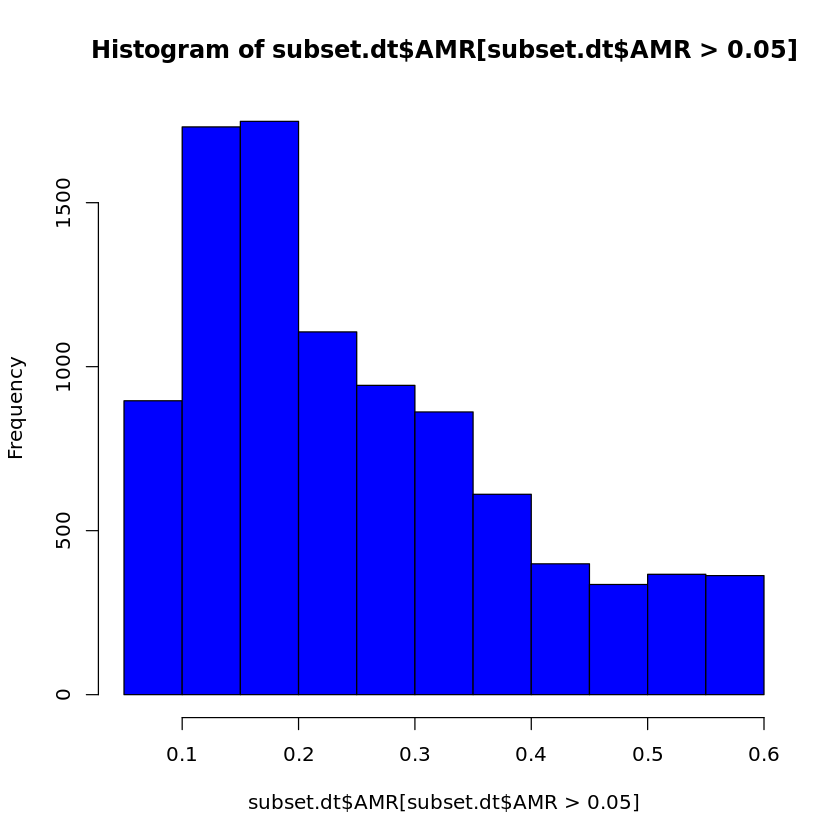

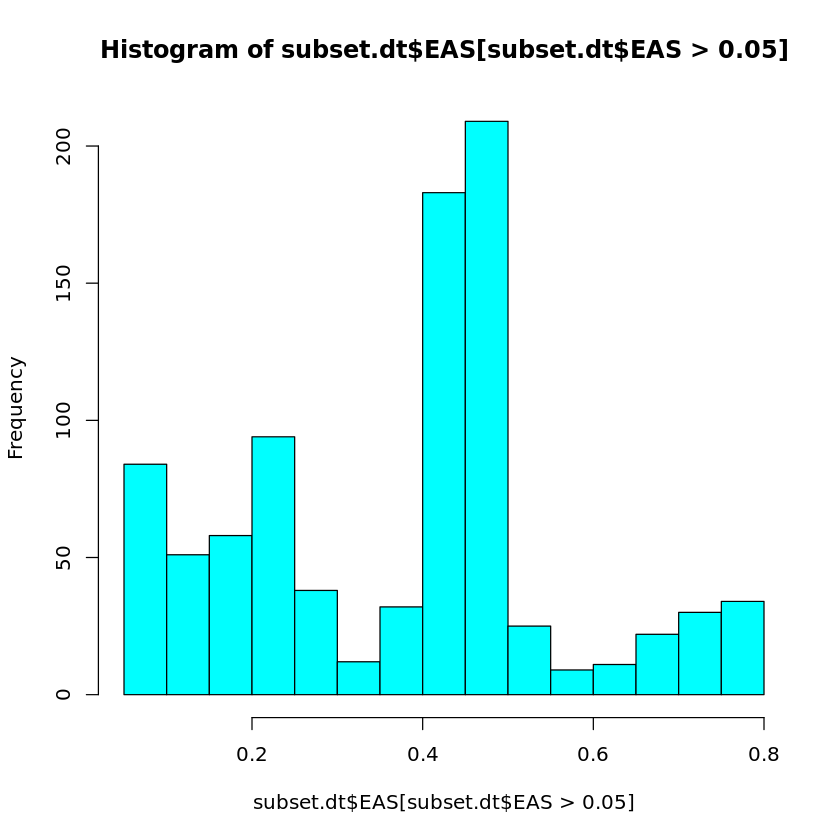

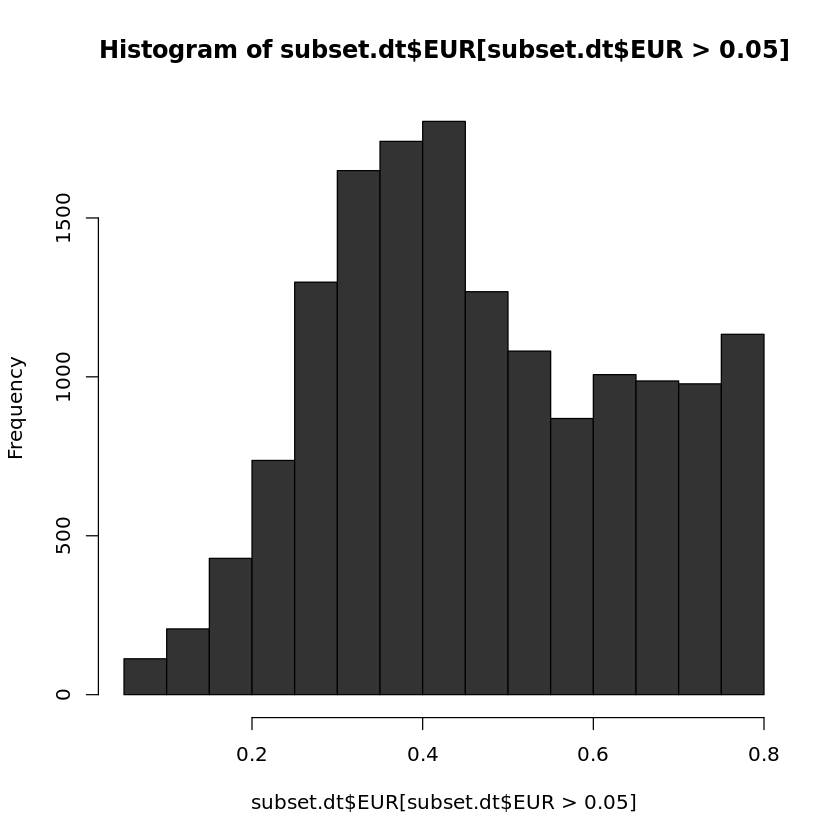

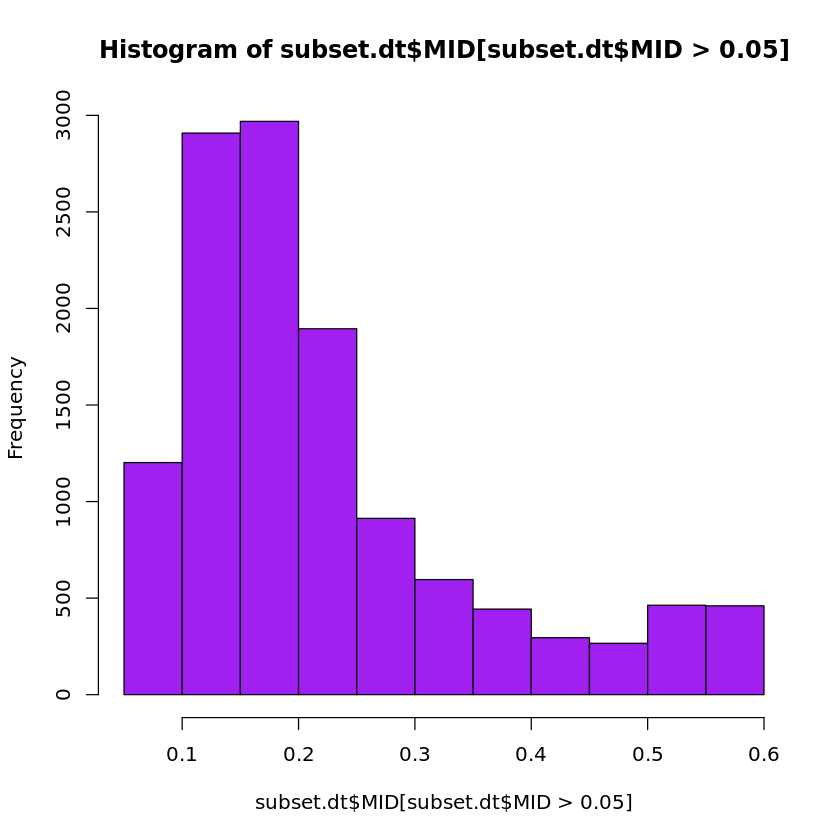

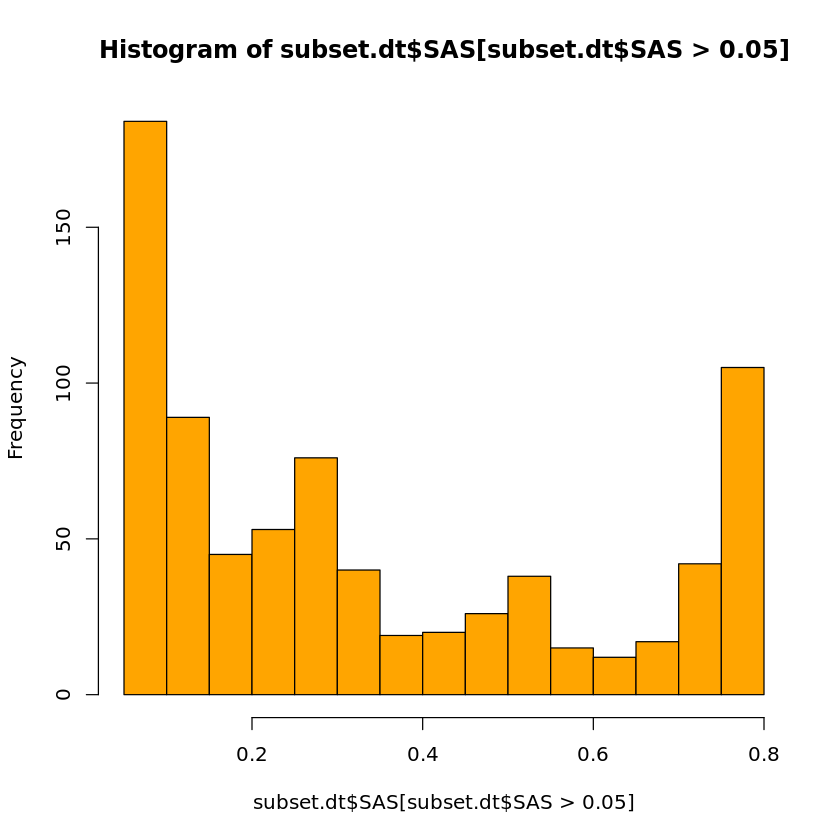

In [26]:
hist(subset.dt$AFR[subset.dt$AFR>0.05], col="red")
hist(subset.dt$AMR[subset.dt$AMR>0.05], col="blue")
hist(subset.dt$EAS[subset.dt$EAS>0.05], col="cyan")
hist(subset.dt$EUR[subset.dt$EUR>0.05], col="gray20")
hist(subset.dt$MID[subset.dt$MID>0.05], col="purple")
hist(subset.dt$SAS[subset.dt$SAS>0.05], col="orange")

In [27]:
# get OTH that are more than 50% of any ancestry
subset.AFR <- subset.dt[][subset.dt$AFR>0.5]
length(subset.AFR$person_id)

subset.AMR <- subset.dt[][subset.dt$AMR>0.5]
length(subset.AMR$person_id)

subset.EAS <- subset.dt[][subset.dt$EAS>0.5]
length(subset.EAS$person_id)

subset.EUR <- subset.dt[][subset.dt$EUR>0.5]
length(subset.EUR$person_id)

subset.MID <- subset.dt[][subset.dt$MID>0.5]
length(subset.MID$person_id)

subset.SAS <- subset.dt[][subset.dt$SAS>0.5]
length(subset.SAS$person_id)

subset.else <- subset.dt[][subset.dt$AFR<=0.5 & subset.dt$AMR<=0.5 & subset.dt$EAS<=0.5 & subset.dt$EUR<=0.5 &
                          subset.dt$MID<=0.5 & subset.dt$SAS<=0.5]
length(subset.else$person_id)
#my_admix_barplot(subset.eur, sortkey="EUR")

[1] 1015

[1] 730

[1] 131

[1] 6056

[1] 923

[1] 229

[1] 6421

In [28]:
# get OTH that are more than 50% of any ancestry
subset.AFR <- subset.dt[][subset.dt$AFR>=0.5]
length(subset.AFR$person_id)

subset.AMR <- subset.dt[][subset.dt$AMR>=0.5]
length(subset.AMR$person_id)

subset.EAS <- subset.dt[][subset.dt$EAS>=0.5]
length(subset.EAS$person_id)

subset.EUR <- subset.dt[][subset.dt$EUR>=0.5]
length(subset.EUR$person_id)

subset.MID <- subset.dt[][subset.dt$MID>=0.5]
length(subset.MID$person_id)

subset.SAS <- subset.dt[][subset.dt$SAS>=0.5]
length(subset.SAS$person_id)

subset.else <- subset.dt[][subset.dt$AFR<0.5 & subset.dt$AMR<0.5 & subset.dt$EAS<0.5 & subset.dt$EUR<0.5 &
                          subset.dt$MID<0.5 & subset.dt$SAS<0.5]
length(subset.else$person_id)
#my_admix_barplot(subset.eur, sortkey="EUR")

[1] 1015

[1] 730

[1] 131

[1] 6056

[1] 923

[1] 229

[1] 6421

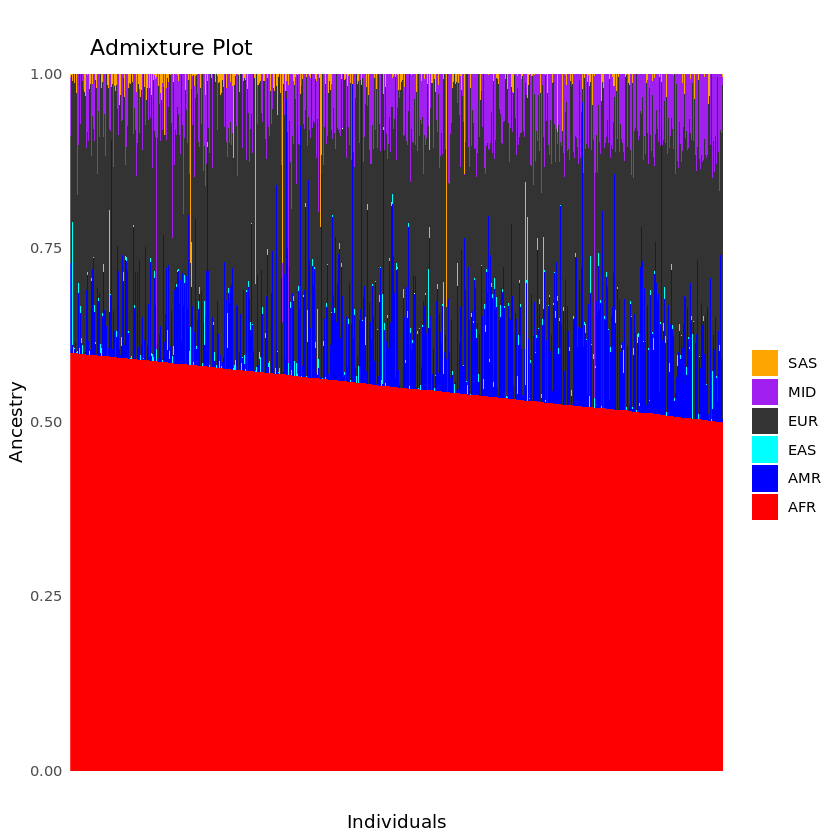

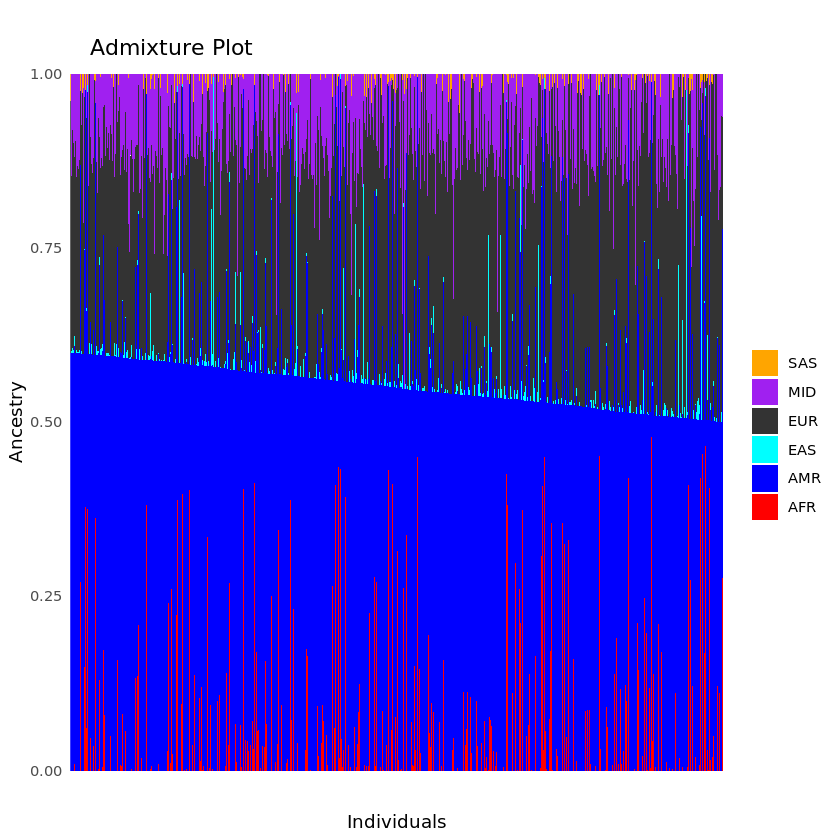

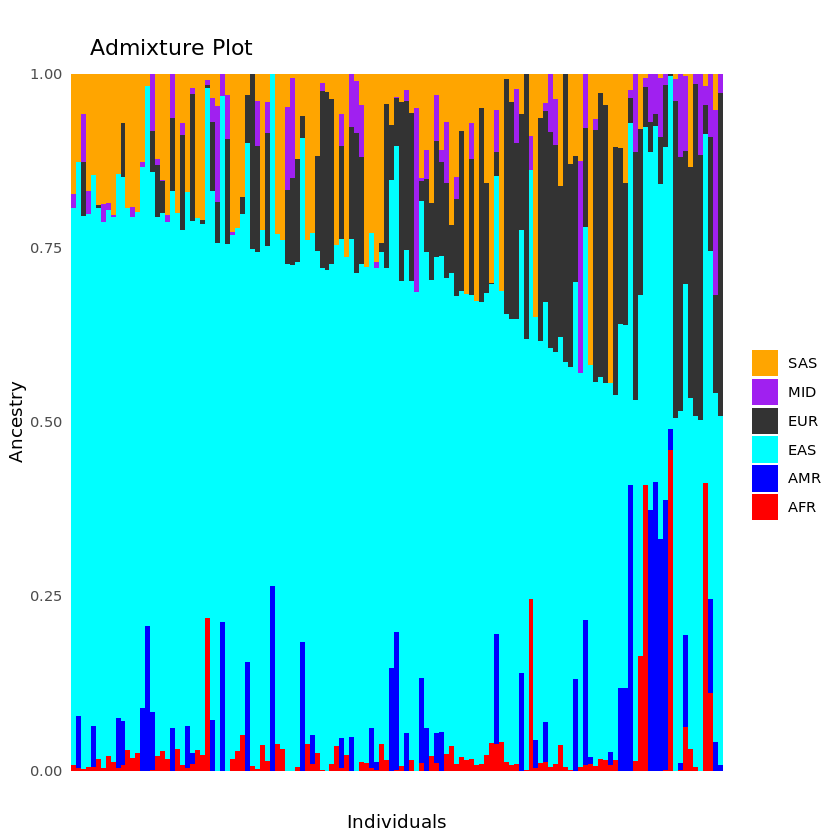

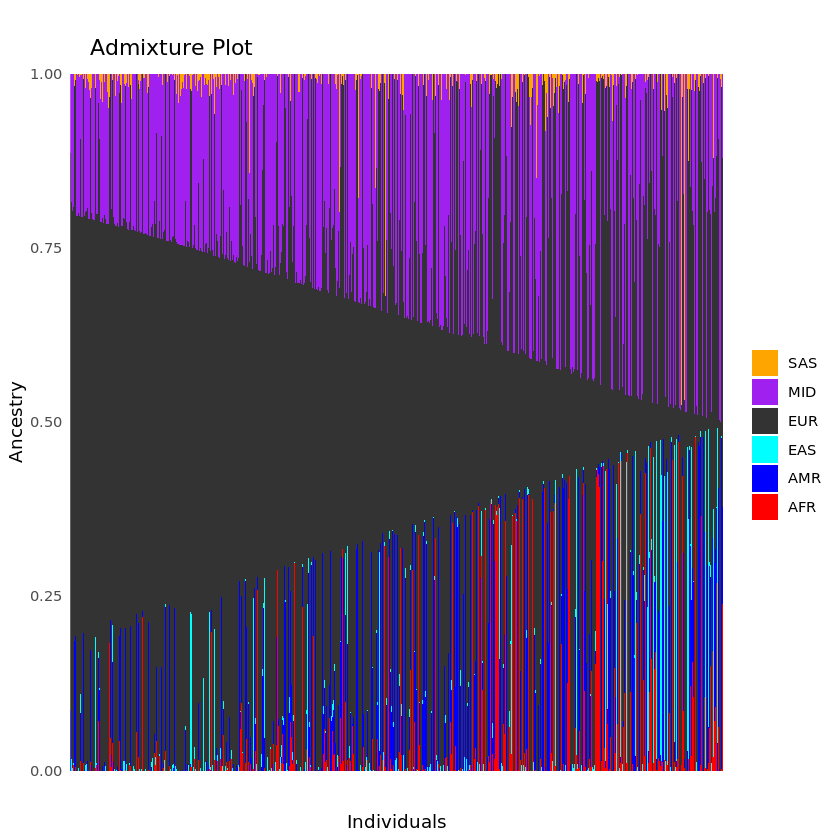

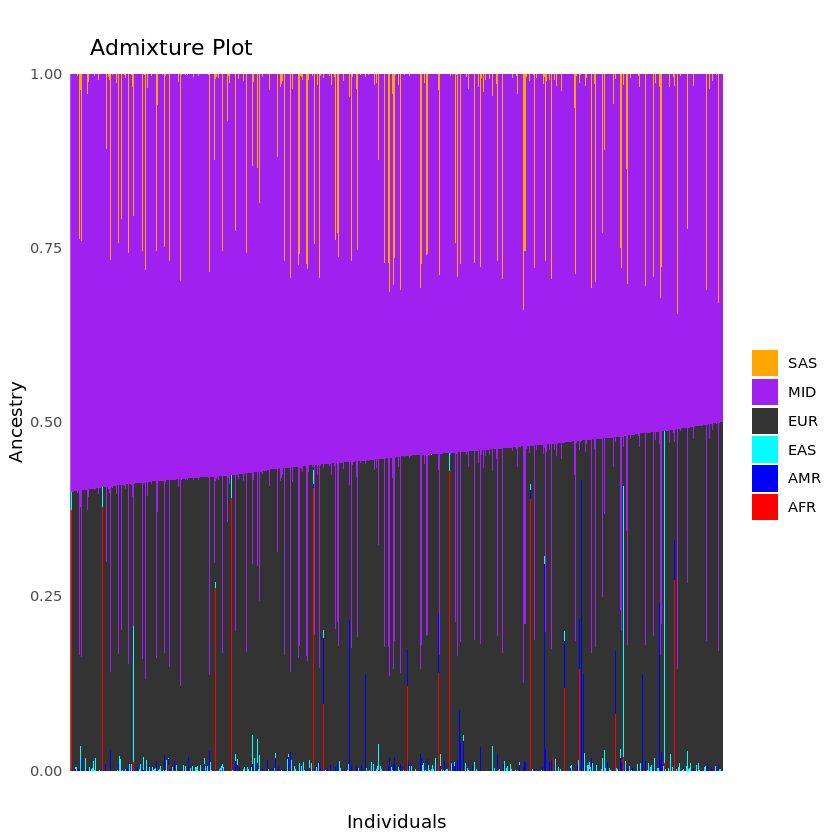

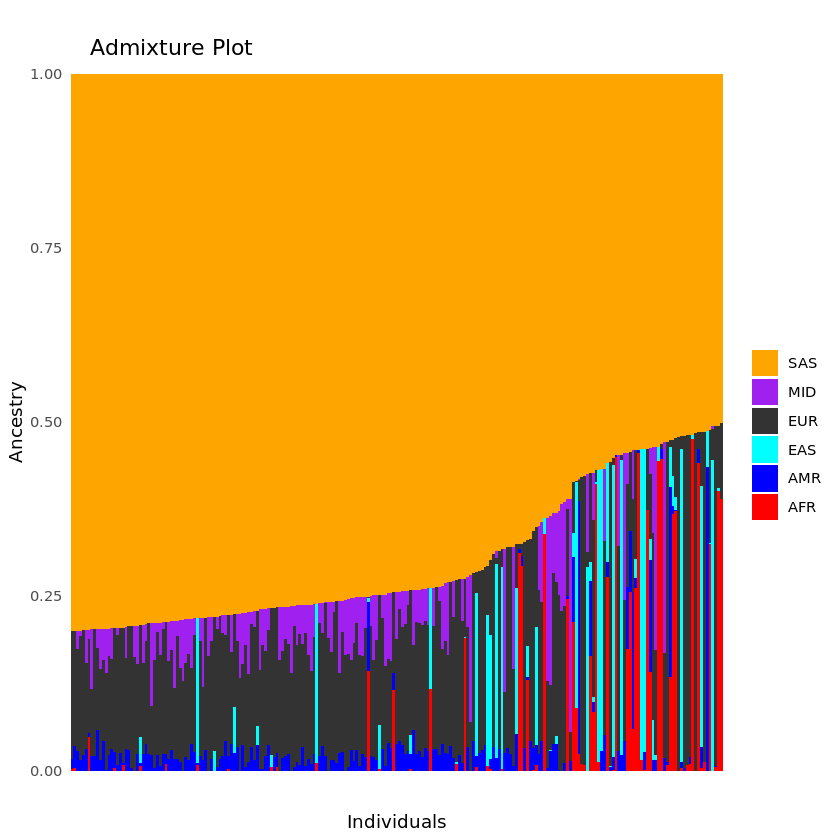

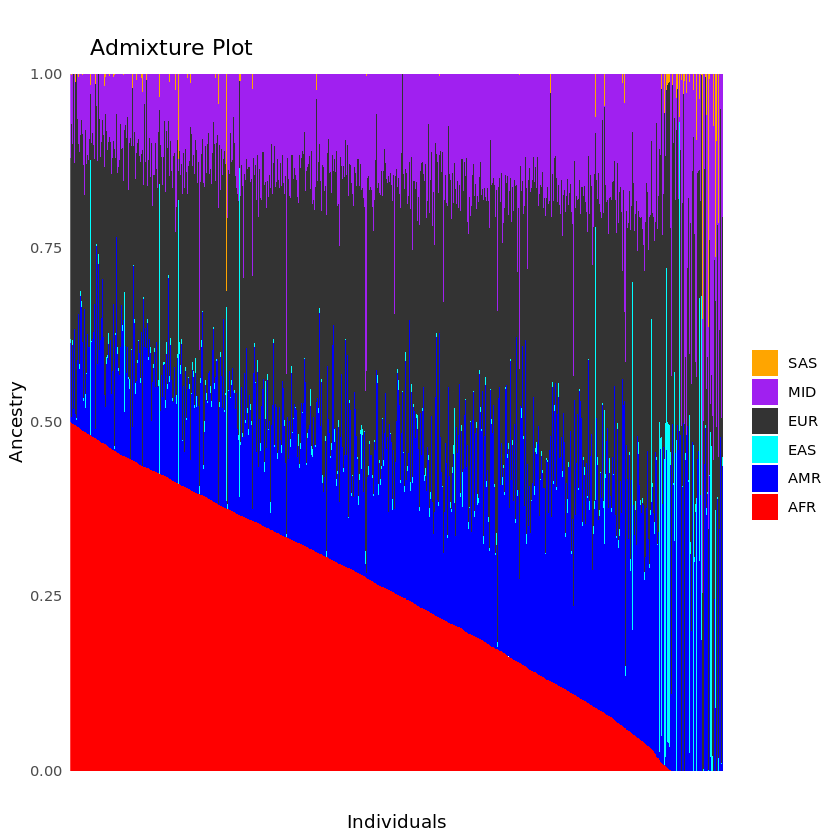

In [29]:
my_admix_barplot(subset.AFR, sortkey="AFR")
my_admix_barplot(subset.AMR, sortkey="AMR")
my_admix_barplot(subset.EAS, sortkey="EAS")
my_admix_barplot(subset.EUR, sortkey="EUR")
my_admix_barplot(subset.MID, sortkey="MID")
my_admix_barplot(subset.SAS, sortkey="SAS")
my_admix_barplot(subset.else, sortkey="AFR")


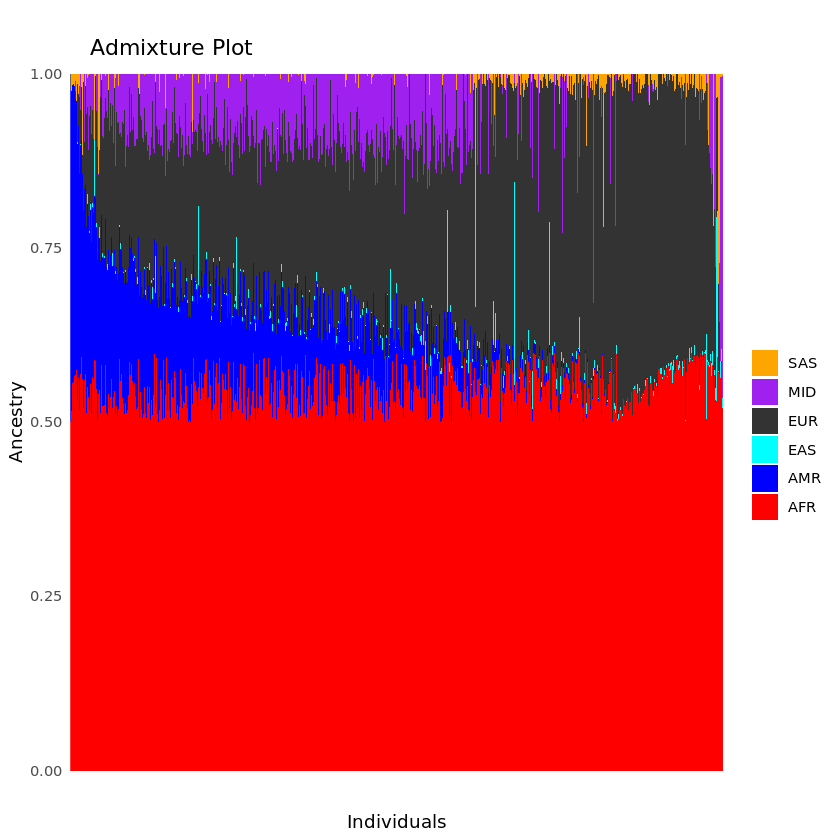

In [40]:
# try ordering ahead of time within the groups
my_admix_barplot(arrange(subset.AFR,desc(AMR),desc(EUR)), sortkey="AMR")

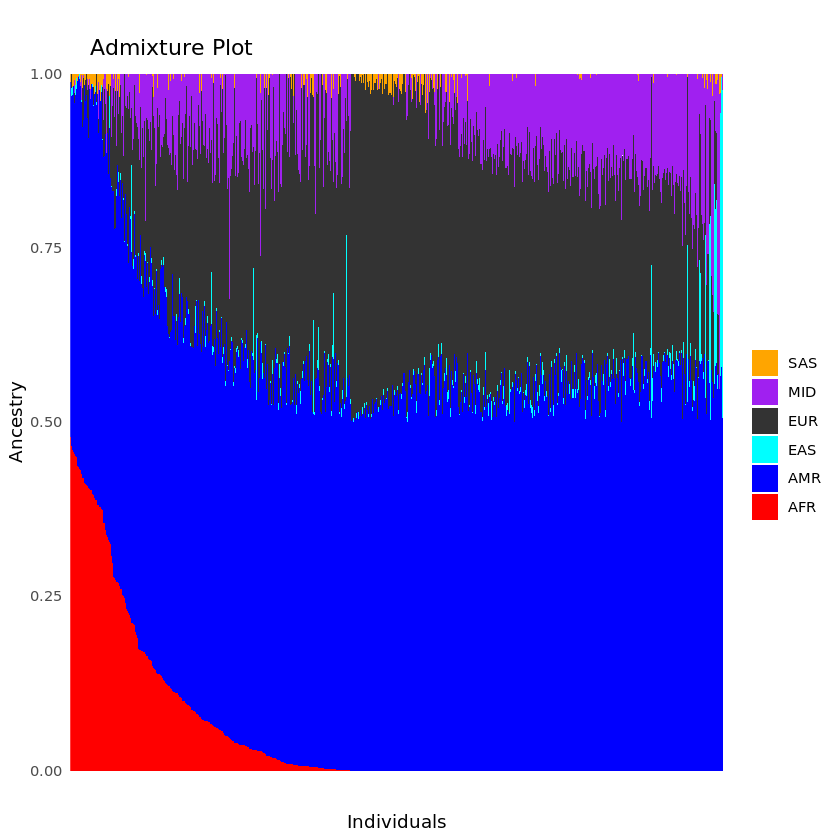

In [56]:
my_admix_barplot(arrange(subset.AMR,desc(AFR),desc(EUR)), sortkey="AFR")

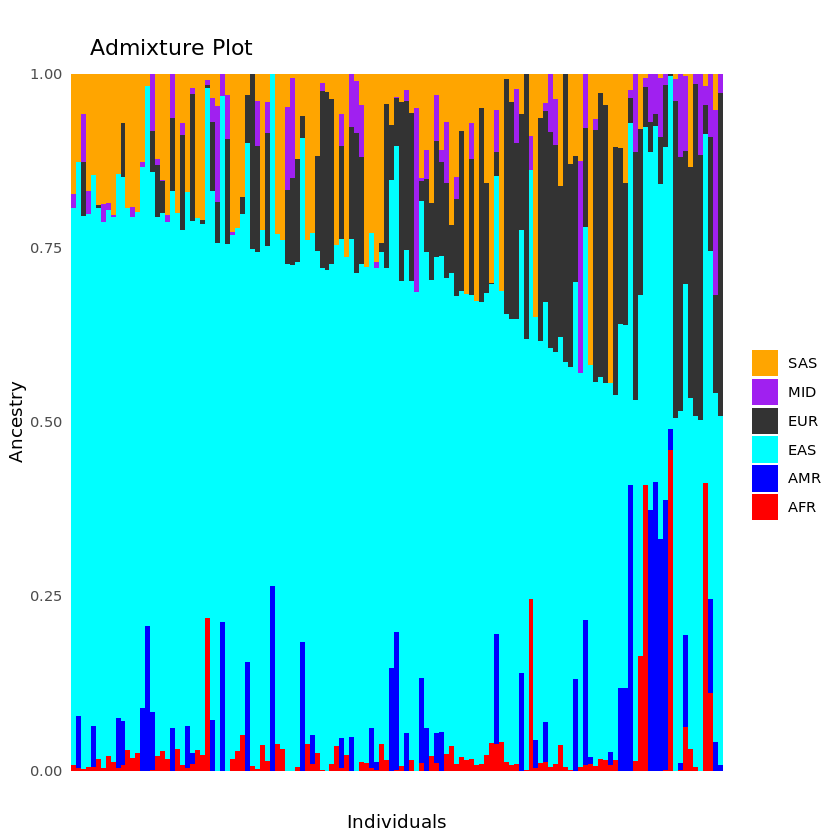

In [55]:
my_admix_barplot(arrange(subset.EAS,desc(SAS),desc(EUR)), sortkey="EAS")

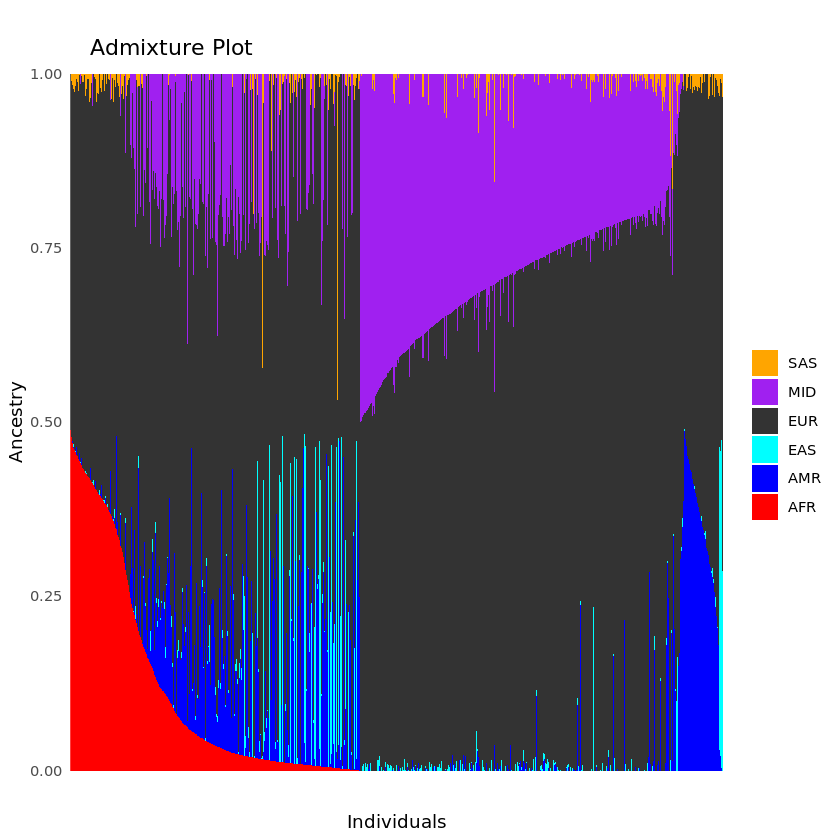

In [54]:
my_admix_barplot(arrange(subset.EUR,desc(MID),desc(AMR)), sortkey="AFR")

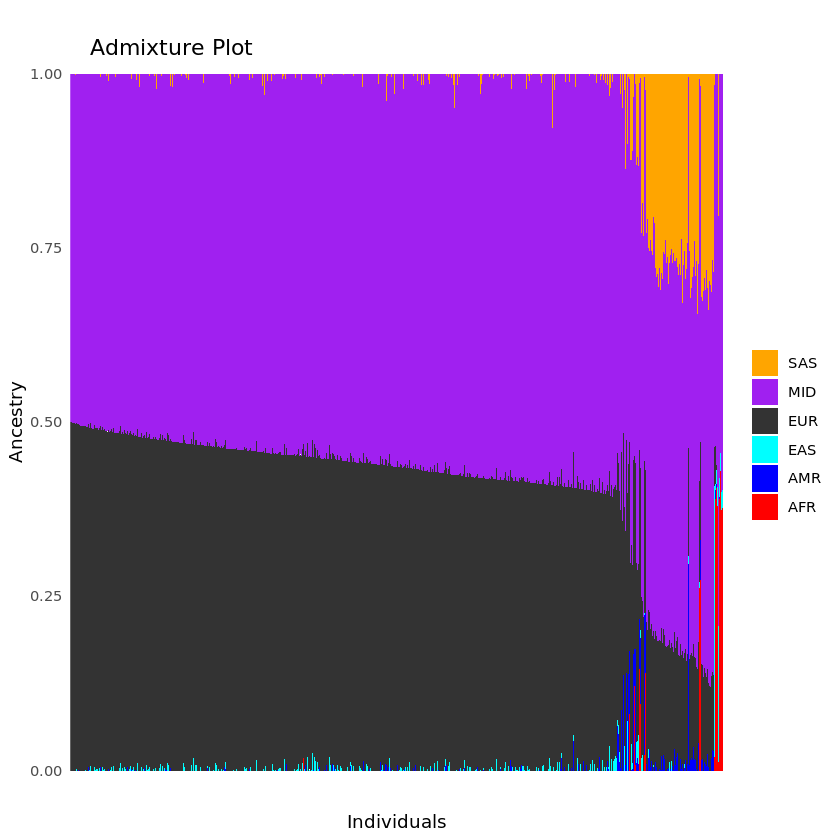

In [57]:
my_admix_barplot(arrange(subset.MID,desc(EUR)), sortkey="EUR")

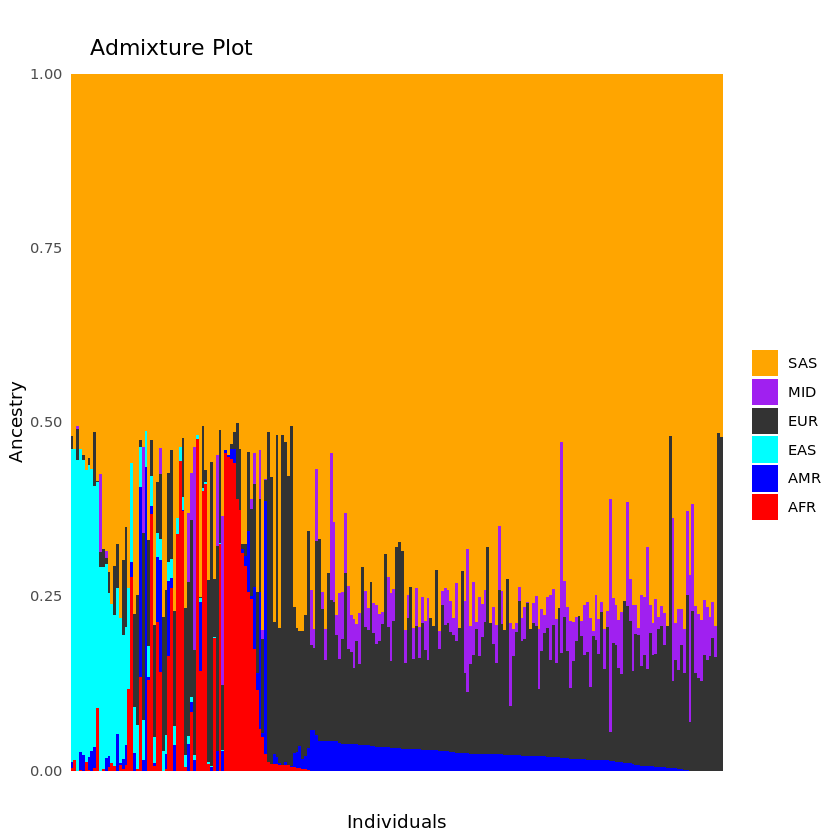

In [82]:
my_admix_barplot(arrange(subset.SAS,desc(EAS),desc(AFR),desc(AMR),desc(EUR)), sortkey="EAS")

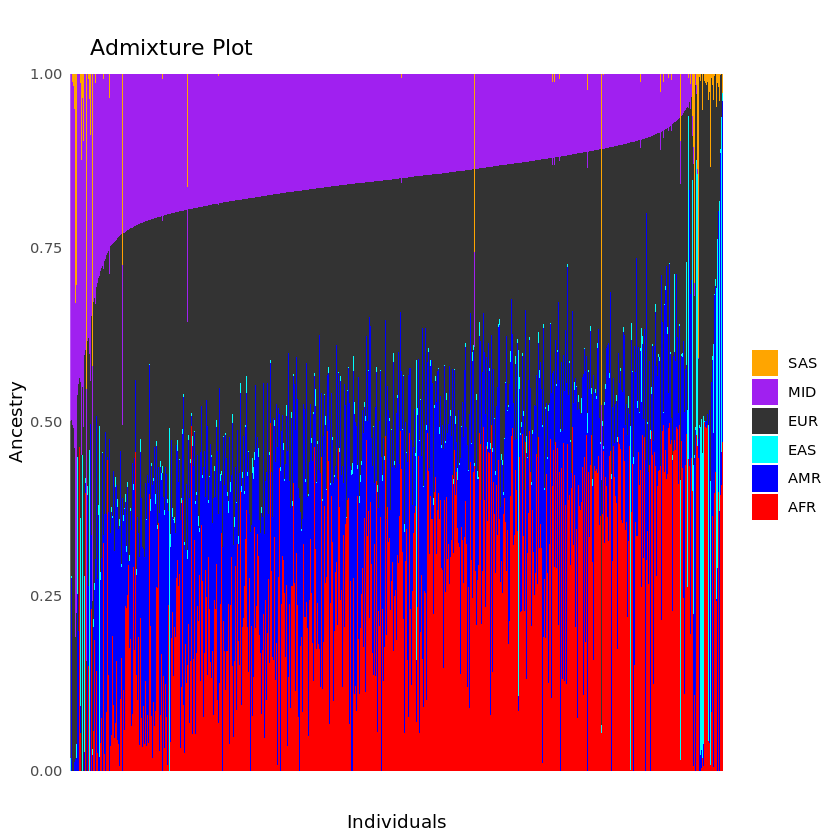

In [96]:
my_admix_barplot(arrange(subset.else,desc(EUR),desc(AMR),desc(AFR)), sortkey="MID")

# PC plots in cleaned cases and controls

In [ ]:
# stick with just cleaned cases and screened controls
subset.dt <- merge.dt[][(merge.dt$CSET3==1 | merge.dt$SCREENED==1)]
#subset.dt <- merge.dt[][!(merge.dt$CSET1==1 & merge.dt$CSET3==0) ]
as.data.frame(subset.dt) %>%
    count(CSET1, CSET3, SCREENED)

In [ ]:
(pc.names <- names(merge.dt)[names(merge.dt) %like% "^PC"])
#(pc.cols <- (paste0("subset.dt$",pc.names)))
str(subset.dt$PC1)
pcs.dt <- subset.dt[,.SD,.SDcols=pc.names]
pairs(pcs.dt)

In [ ]:
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="AMR"],subset.dt$PC2[subset.dt$my.ancestry=="AMR"],pty=2,col="blue")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH"],subset.dt$PC2[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="SAS"],subset.dt$PC2[subset.dt$my.ancestry=="SAS"],pty=2,col="orange")
points(subset.dt$PC1[subset.dt$my.ancestry=="MID"],subset.dt$PC2[subset.dt$my.ancestry=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

#looking at PC1 vs PC2, most of OTH lies along AFR-EUR pectrum


In [ ]:
# Include the three poles and plot the other ancestries on top, one by one (AFR, EUR, SAS)
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="AMR"],subset.dt$PC2[subset.dt$my.ancestry=="AMR"],pty=2,col="blue")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")

legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)
# is it possible that some of AMR is most like EUR-EAS (PRS development populations) and some are like EUR-AFR

In [ ]:
# repeat, but highlight the cases for AMR
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="AMR"],subset.dt$PC2[subset.dt$my.ancestry=="AMR"],col="blue")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="AMR" & subset.dt$CSET3==1],
       subset.dt$PC2[subset.dt$my.ancestry=="AMR" & subset.dt$CSET3==1],pch=19,col="yellow")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS","AMR cases", "AFR cases"),
       col=c("red","blue","cyan","gray20","purple","tan","orange","yellow"),lty=1)

#subset.dt[,list(my.ancestry,CSET3)][subset.dt$my.ancestry=="AMR" & subset.dt$CSET3==1]

In [ ]:
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH"],subset.dt$PC2[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)


In [ ]:
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH"],subset.dt$PC2[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH" & subset.dt$CSET3==1],
       subset.dt$PC2[subset.dt$my.ancestry=="OTH" & subset.dt$CSET3==1],pch=19,col="black")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS", "OTH cases"),
       col=c("red","blue","cyan","gray20","purple","tan","orange", "black"),lty=1)
#it looks like the OTH cases ten to be on the EAR-AFR spectrum but not on the EAS-EUR spectrum

In [ ]:
# who get moved from OTH to AMR or AFR when we use 60% rule? Does it matter if they are all from EUR or EUR-AFR axis?
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH"],subset.dt$PC2[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH" & subset.dt$my.ancestry2=="AFR"],
       subset.dt$PC2[subset.dt$my.ancestry=="OTH" & subset.dt$my.ancestry2=="AFR"],pch=19,col="pink")
points(subset.dt$PC1[subset.dt$my.ancestry=="OTH" & subset.dt$my.ancestry2=="AMR"],
       subset.dt$PC2[subset.dt$my.ancestry=="OTH" & subset.dt$my.ancestry2=="AMR"],pch=19,col="blue")
#points(subset.dt$PC1[subset.dt$my.ancestry=="OTH" & subset.dt$CSET3==1 & (subset.dt$my.ancestry2=="AFR" | subset.dt$my.ancestry2=="AMR")],
#       subset.dt$PC2[subset.dt$my.ancestry=="OTH" & subset.dt$CSET3==1 & (subset.dt$my.ancestry2=="AFR" | subset.dt$my.ancestry2=="AMR")],
#       pch=19,col="yellow")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS", "AFR60%", "AMR60%"),
       col=c("red","blue","cyan","gray20","purple","tan","orange", "pink", "blue"),lty=1)

In [ ]:
as.data.frame(subset.dt[subset.dt$my.ancestry=="OTH" & (subset.dt$my.ancestry2=="AFR" | subset.dt$my.ancestry2=="AMR")]) %>%
    count(CSET3, SCREENED, my.ancestry, my.ancestry2)

In [ ]:
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="SAS"],subset.dt$PC2[subset.dt$my.ancestry=="SAS"],pty=2,col="orange")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)
# SAS lies between EAS and EUR

In [ ]:
plot(subset.dt$PC1,subset.dt$PC2,type="n")
points(subset.dt$PC1[subset.dt$my.ancestry=="EUR"],subset.dt$PC2[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC1[subset.dt$my.ancestry=="AFR"],subset.dt$PC2[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC1[subset.dt$my.ancestry=="EAS"],subset.dt$PC2[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC1[subset.dt$my.ancestry=="MID"],subset.dt$PC2[subset.dt$my.ancestry=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

#Interestingly the MID group looks like it could be included with the OTH group. Not sure what makes the MID?

In [ ]:
plot(subset.dt$PC3,subset.dt$PC4,type="n")
points(subset.dt$PC3[subset.dt$my.ancestry=="EUR"],subset.dt$PC4[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC3[subset.dt$my.ancestry=="AFR"],subset.dt$PC4[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC3[subset.dt$my.ancestry=="AMR"],subset.dt$PC4[subset.dt$my.ancestry=="AMR"],pty=2,col="blue")
points(subset.dt$PC3[subset.dt$my.ancestry=="OTH"],subset.dt$PC4[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC3[subset.dt$my.ancestry=="EAS"],subset.dt$PC4[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC3[subset.dt$my.ancestry=="SAS"],subset.dt$PC4[subset.dt$my.ancestry=="SAS"],pty=2,col="orange")
points(subset.dt$PC3[subset.dt$my.ancestry=="MID"],subset.dt$PC4[subset.dt$my.ancestry=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)
# looks like MID still clusters with OTH

In [ ]:
plot(subset.dt$PC6,subset.dt$PC5,type="n")
points(subset.dt$PC6[subset.dt$my.ancestry=="EUR"],subset.dt$PC5[subset.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(subset.dt$PC6[subset.dt$my.ancestry=="AFR"],subset.dt$PC5[subset.dt$my.ancestry=="AFR"],pty=2,col="red")
points(subset.dt$PC6[subset.dt$my.ancestry=="AMR"],subset.dt$PC5[subset.dt$my.ancestry=="AMR"],pty=2,col="blue")
points(subset.dt$PC6[subset.dt$my.ancestry=="OTH"],subset.dt$PC5[subset.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(subset.dt$PC6[subset.dt$my.ancestry=="EAS"],subset.dt$PC5[subset.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(subset.dt$PC6[subset.dt$my.ancestry=="SAS"],subset.dt$PC5[subset.dt$my.ancestry=="SAS"],pty=2,col="orange")
points(subset.dt$PC6[subset.dt$my.ancestry=="MID"],subset.dt$PC5[subset.dt$my.ancestry=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)

# PC plots for all participants in the the case/control data set

In [ ]:
plot(merge.dt$PC1,merge.dt$PC2,type="n")
points(merge.dt$PC1[merge.dt$my.ancestry=="EUR"],merge.dt$PC2[merge.dt$my.ancestry=="EUR"],pty=2,col="gray80")
points(merge.dt$PC1[merge.dt$my.ancestry=="AFR"],merge.dt$PC2[merge.dt$my.ancestry=="AFR"],pty=2,col="red")
points(merge.dt$PC1[merge.dt$my.ancestry=="AMR"],merge.dt$PC2[merge.dt$my.ancestry=="AMR"],pty=2,col="blue")
points(merge.dt$PC1[merge.dt$my.ancestry=="OTH"],merge.dt$PC2[merge.dt$my.ancestry=="OTH"],pty=2,col="tan")
points(merge.dt$PC1[merge.dt$my.ancestry=="EAS"],merge.dt$PC2[merge.dt$my.ancestry=="EAS"],pty=2,col="cyan")
points(merge.dt$PC1[merge.dt$my.ancestry=="SAS"],merge.dt$PC2[merge.dt$my.ancestry=="SAS"],pty=2,col="orange")
points(merge.dt$PC1[merge.dt$my.ancestry=="MID"],merge.dt$PC2[merge.dt$my.ancestry=="MID"],pty=2,col="purple")
legend("bottomleft",legend=c("AFR","AMR","EAS","EUR","MID","OTH","SAS"),
       col=c("red","blue","cyan","gray20","purple","tan","orange"),lty=1)
# results are basically the same, just with more points in the plot

In [ ]:
# skip for now
# combine the case and control sex tables
setnames(sex.dist.case.table,c("Ancestry","case F","case M","case NA","case %M"))
sex.dist.control.table[,my.ancestry:=NULL]
setnames(sex.dist.control.table,c("control F","control M","control %M"))

(sex.dist.table <- cbind(sex.dist.case.table,sex.dist.control.table))

In [ ]:
#distribution of censored age
vioplot(censored.age ~ my.ancestry, data=merge.dt[][merge.dt$CRC.status==0], side="left")
vioplot(censored.age ~ my.ancestry, data=merge.dt[][merge.dt$CRC.status==1], side="right", add=TRUE)

vioplot(censored.age ~ my.ancestry, data=merge.dt[][merge.dt$SCREENED==1], side="left")
vioplot(censored.age ~ my.ancestry, data=merge.dt[][merge.dt$CSET3==1], side="right", add=TRUE)


In [ ]:
#distribution of consent age
vioplot(AGE ~ my.ancestry, data=merge.dt[][merge.dt$CRC.status==0], side="left")
vioplot(AGE ~ my.ancestry, data=merge.dt[][merge.dt$CRC.status==1], side="right", add=TRUE)